In [1]:
%matplotlib inline
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import seaborn as sns
import os.path
from scipy.stats import ttest_ind
import missingno as msno

!pip install missingno 

In [2]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-PFMG0IP\SQLEXPRESS;"
                      "Database=BoxOfficeComplete;"
                      "Trusted_Connection=yes;")

In [3]:
# check if file exists
if os.path.exists('movies_ff.csv'):
    movies_ff = pd.read_csv('movies_ff.csv',index_col=0)
else:
    # Get the movies_ff_v table
    movies_ff = pd.read_sql("SELECT * FROM movies_ff_v;",conn)
    # save to csv
    movies_ff.to_csv('movies_ff.csv')

# 2.1

In [4]:
movies_ff.describe(include='all')

movie_id        budget original_language   popularity release_date  \
count   7375.000000  7.375000e+03              7375  7375.000000         7374   
unique          NaN           NaN                44          NaN         4696   
top             NaN           NaN                en          NaN   2010-09-10   
freq            NaN           NaN              6336          NaN           10   
mean    3698.121763  2.266666e+07               NaN     8.539777          NaN   
std     2136.744430  3.698735e+07               NaN    12.176384          NaN   
min        1.000000  0.000000e+00               NaN     0.000001          NaN   
25%     1848.500000  0.000000e+00               NaN     3.970199          NaN   
50%     3696.000000  8.000000e+06               NaN     7.455875          NaN   
75%     5550.500000  2.900000e+07               NaN    10.932212          NaN   
max     7398.000000  3.800000e+08               NaN   547.488298          NaN   

            runtime runtime_cat       revenue   sw_lang_en  sw_web_presence  \
count   7370.000000        7375  2.993000e+03  7375.000000      7375.000000   
unique          NaN           3           NaN          NaN              NaN   
top             NaN      Medium           NaN          NaN              NaN   
freq            NaN        3884           NaN          NaN              NaN   
mean     107.747218         NaN  6.687931e+07     0.859119         0.320407   
std       21.412662         NaN  1.376564e+08     0.347923         0.466665   
min        0.000000         NaN  1.000000e+00     0.000000         0.000000   
25%       94.000000         NaN  2.405420e+06     1.000000         0.000000   
50%      104.000000         NaN  1.692814e+07     1.000000         0.000000   
75%      118.000000         NaN  6.905570e+07     1.000000         1.000000   
max      338.000000         NaN  1.519558e+09     1.000000         1.000000   

        ...  depart_Camera_female  depart_Crew_female  \
count   ...           7341.000000         7341.000000   
unique  ...                   NaN                 NaN   
top     ...                   NaN                 NaN   
freq    ...                   NaN                 NaN   
mean    ...              0.020433            0.064433   
std     ...              0.145287            0.335567   
min     ...              0.000000            0.000000   
25%     ...              0.000000            0.000000   
50%     ...              0.000000            0.000000   
75%     ...              0.000000            0.000000   
max     ...              3.000000           10.000000   

        depart_Custom_Mkup_female  depart_Directing_female  \
count                 7341.000000              7341.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                     0.353494                 0.153521   
std                      0.651521                 0.394440   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.000000                 0.000000   
75%                      1.000000                 0.000000   
max                      6.000000                 4.000000   

        depart_Editing_female  depart_Lighting_female  \
count             7341.000000             7341.000000   
unique                    NaN                     NaN   
top                       NaN                     NaN   
freq                      NaN                     NaN   
mean                 0.121646                0.000681   
std                  0.357933                0.026091   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  5.000000   

# 2.2

In [5]:
movies_f= movies_ff.drop(['release_date','original_language','runtime'], axis=1)
movies_f = movies_f[np.isfinite(movies_f['revenue'])] #leaves only the finit numbers, drops null

In [6]:
for col,val in movies_f.items():
    if len(np.unique(val)) == 2 or col in ('sw_female_actor0', 'sw_female_actor1', 'sw_female_actor2', 'sw_male_actor0', 'sw_male_actor1', 'sw_male_actor2', 'runtime_cat', "release_year","release_month","release_day"):
        movies_f[col]= movies_f[col].astype('category')
    else:
        movies_f[col]= movies_f[col].astype('float64')


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(pd.DataFrame(movies_f.dtypes))

                                     0
movie_id                       float64
budget                         float64
popularity                     float64
runtime_cat                   category
revenue                        float64
sw_lang_en                    category
sw_web_presence               category
sw_has_poster                 category
sw_tagline                    category
keyword_cnt                    float64
release_year                  category
release_month                 category
high_release_month            category
release_day                   category
seasonality                    float64
sw_collection                  float64
producers_cnt                  float64
countries_cnt                  float64
lang_US                       category
lang_FR                       category
lang_RU                       category
lang_ES                       category
lang_JA                       category
keywords_cnt                   float64
actor0_movies_cnt        

# :עבור משתנים נומריים

היסטוגרמה המתארת את התפלגות ערכי המשתנה

גרף פיזור של ערכי המשתנה מול ערכי משתנה המטרה (רווח)

# :עבור משתנים קטגוריאליים

גרף עמודות הסופר את התצפיות בכל קטגוריה

בוקס פלוט של ערכי משתנה המטרה (רווח) בכל קטגוריה הקיימת במשתנה המסביר

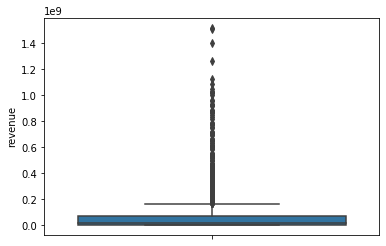

movie_id Type: float64
Missing: 0 (0.0%)
Mean: 1499.4183093885733 (Std: 865.9768583727291)
Median: 1498.0 
Min: 1.0 Max: 3000.0


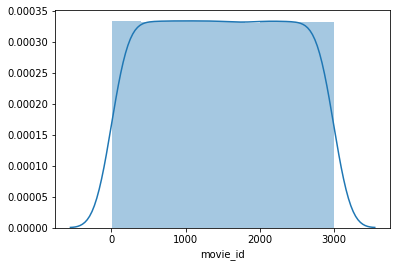

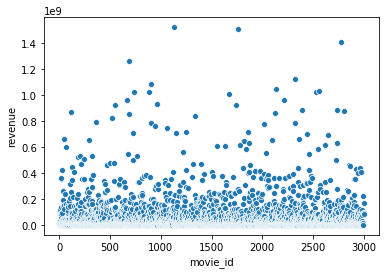

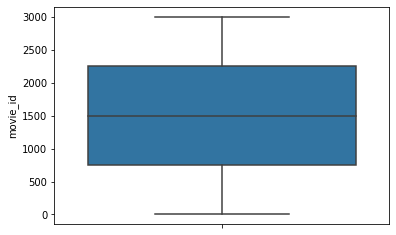

budget Type: float64
Missing: 0 (0.0%)
Mean: 22582092.325425994 (Std: 37048250.47211586)
Median: 8000000.0 
Min: 0.0 Max: 380000000.0


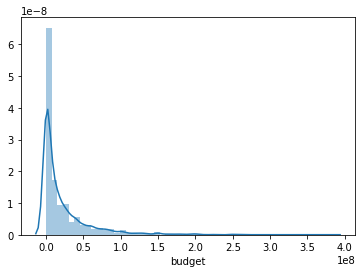

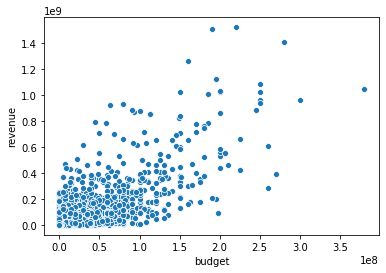

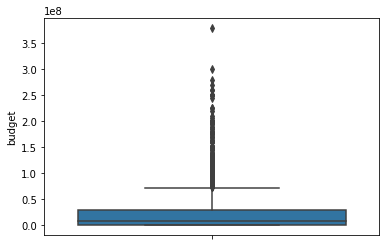

popularity Type: float64
Missing: 0 (0.0%)
Mean: 8.482163912462429 (Std: 12.109809500777803)
Median: 7.392294000000001 
Min: 1e-06 Max: 294.337037


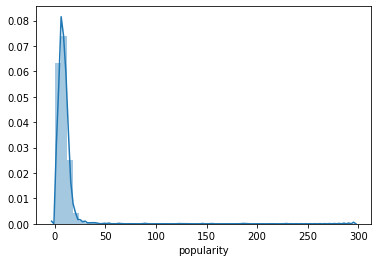

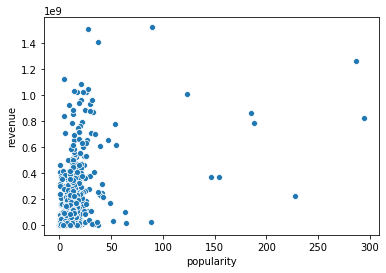

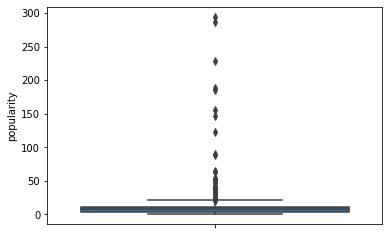

runtime_cat Type: category
Missing: 0 (0.0%)


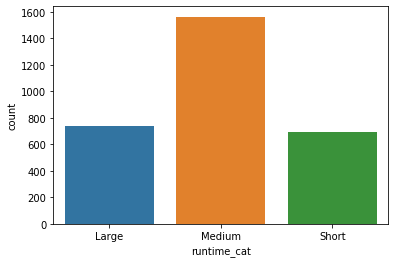

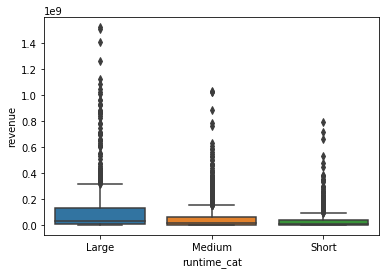

revenue Type: float64
Missing: 0 (0.0%)
Mean: 66879311.64717674 (Std: 137633430.910923)
Median: 16928137.0 
Min: 1.0 Max: 1519557910.0


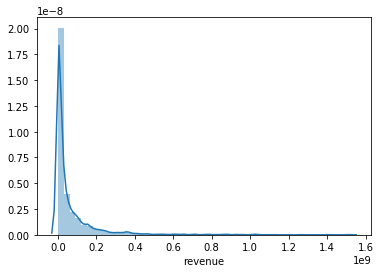

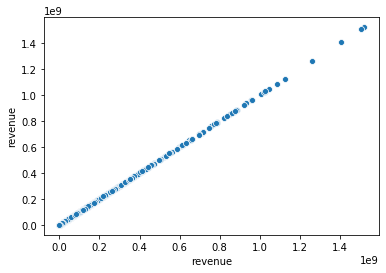

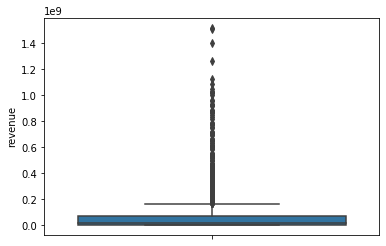

sw_lang_en Type: category
Missing: 0 (0.0%)


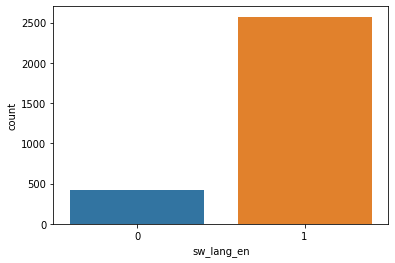

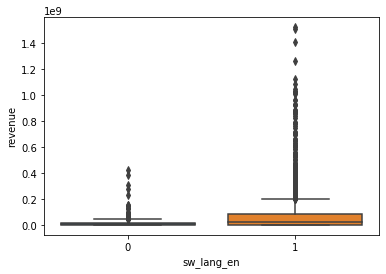

sw_web_presence Type: category
Missing: 0 (0.0%)


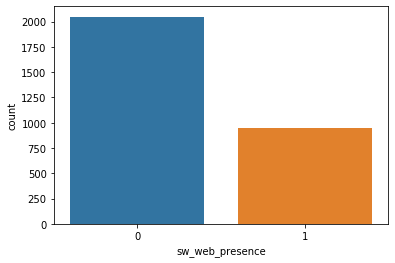

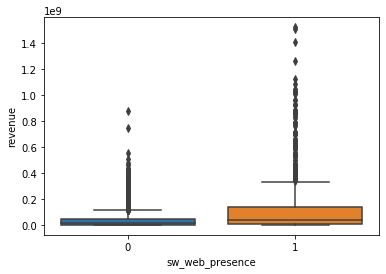

sw_has_poster Type: category
Missing: 0 (0.0%)


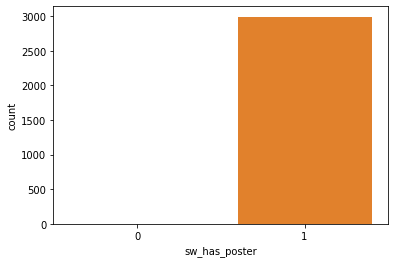

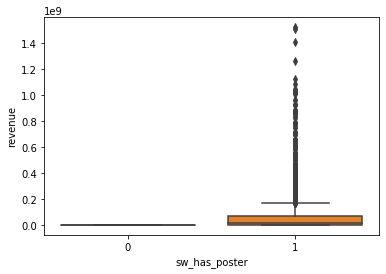

sw_tagline Type: category
Missing: 0 (0.0%)


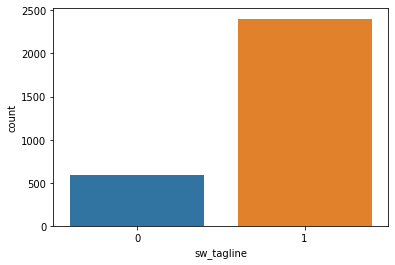

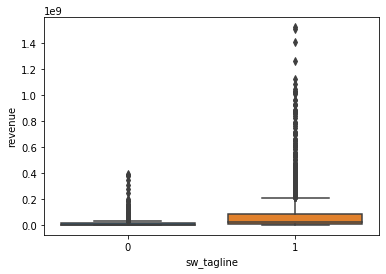

keyword_cnt Type: float64
Missing: 0 (0.0%)
Mean: 7.242900100233879 (Std: 6.6640648242897065)
Median: 6.0 
Min: 0.0 Max: 149.0


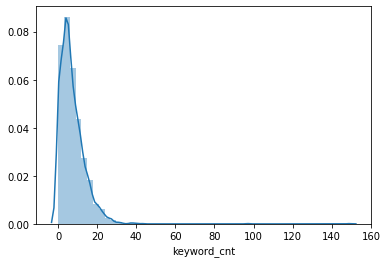

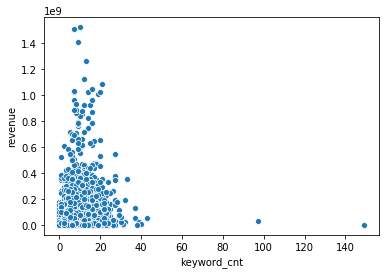

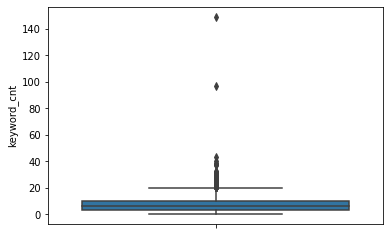

release_year Type: category
Missing: 0 (0.0%)


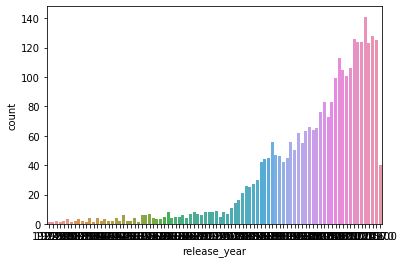

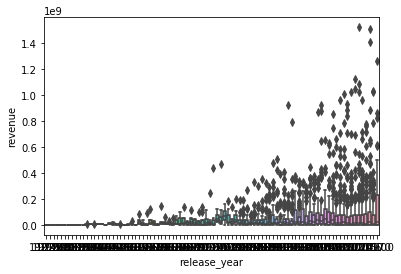

release_month Type: category
Missing: 0 (0.0%)


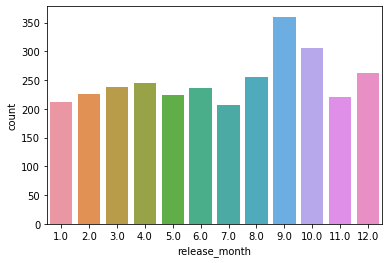

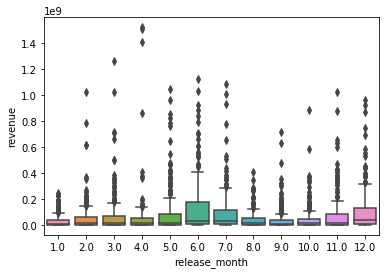

high_release_month Type: category
Missing: 0 (0.0%)


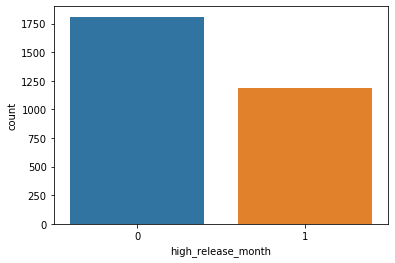

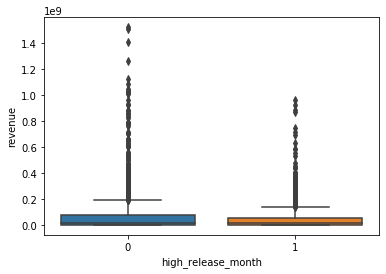

release_day Type: category
Missing: 0 (0.0%)


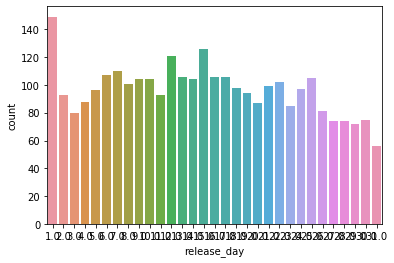

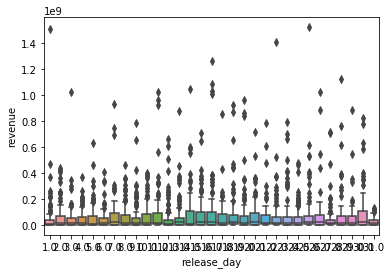

seasonality Type: float64
Missing: 0 (0.0%)
Mean: -2412917.760106916 (Std: 36983541.756315164)
Median: -15309317.0 
Min: -50746591.0 Max: 74205073.0


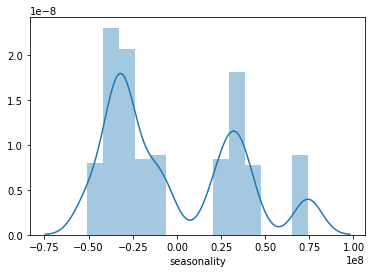

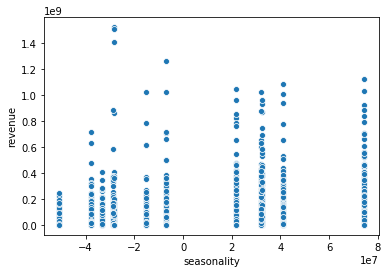

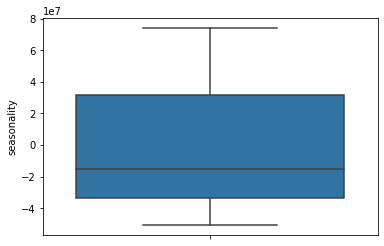

sw_collection Type: float64
Missing: 0 (0.0%)
Mean: 0.028733711994654194 (Std: 0.1748742097366685)
Median: 0.0 
Min: 0.0 Max: 2.0


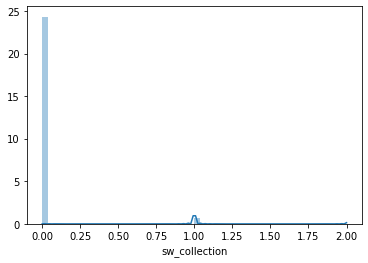

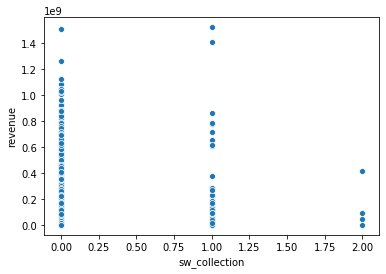

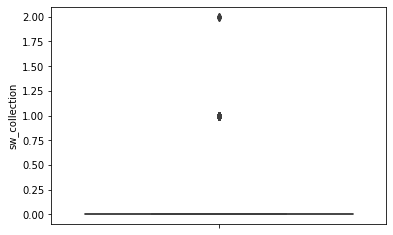

producers_cnt Type: float64
Missing: 149 (4.978282659538924%)
Mean: 2.8463431786216598 (Std: 1.9637942952679956)
Median: 2.0 
Min: 1.0 Max: 17.0


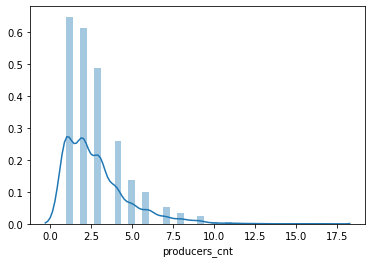

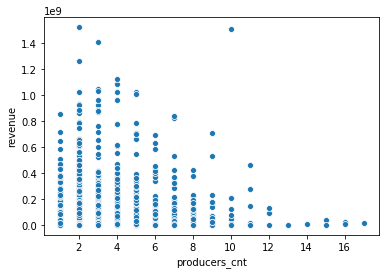

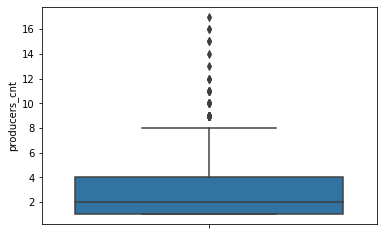

countries_cnt Type: float64
Missing: 0 (0.0%)
Mean: 1.32776478449716 (Std: 0.7517576567461992)
Median: 1.0 
Min: 0.0 Max: 8.0


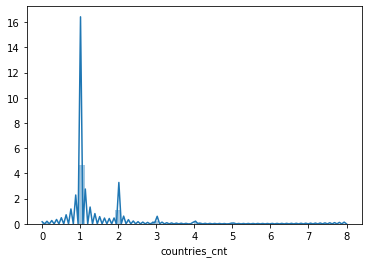

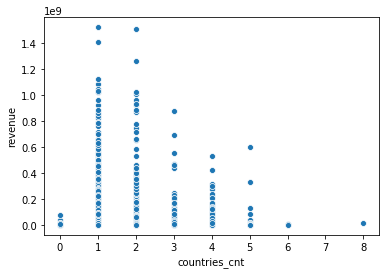

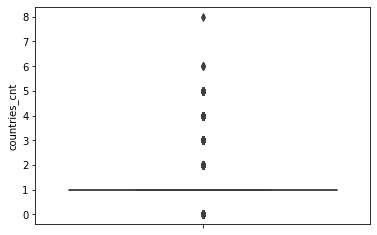

lang_US Type: category
Missing: 0 (0.0%)


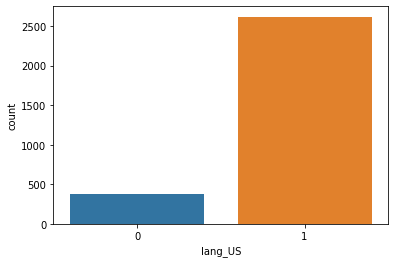

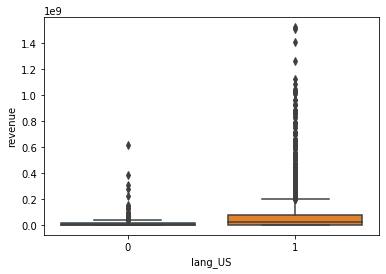

lang_FR Type: category
Missing: 0 (0.0%)


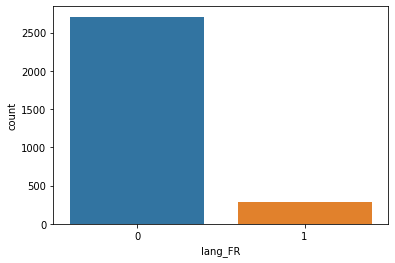

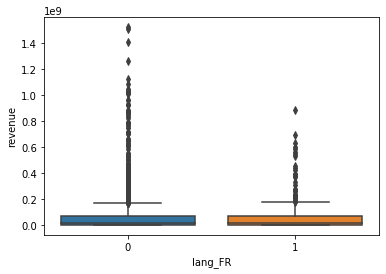

lang_RU Type: category
Missing: 0 (0.0%)


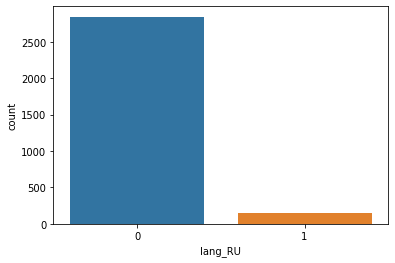

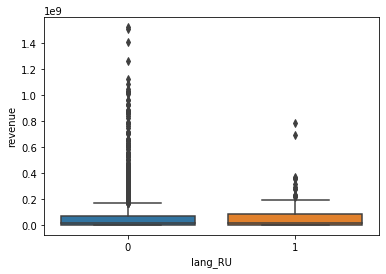

lang_ES Type: category
Missing: 0 (0.0%)


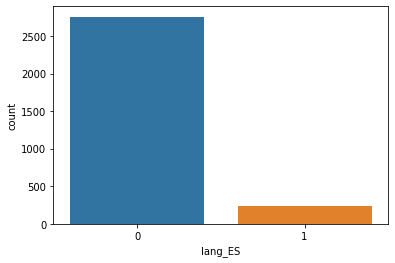

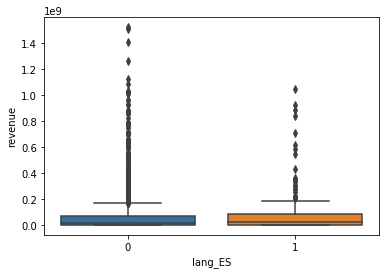

lang_JA Type: category
Missing: 0 (0.0%)


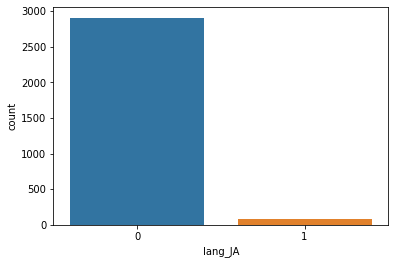

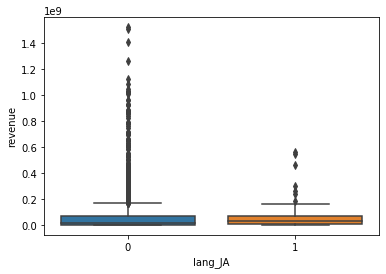

keywords_cnt Type: float64
Missing: 0 (0.0%)
Mean: 7.242900100233879 (Std: 6.6640648242897065)
Median: 6.0 
Min: 0.0 Max: 149.0


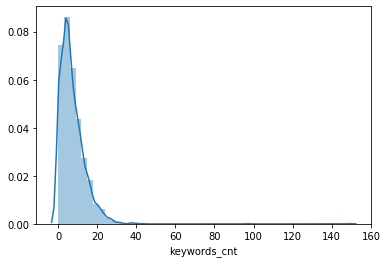

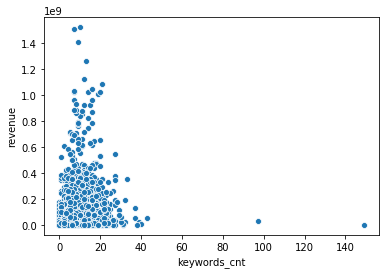

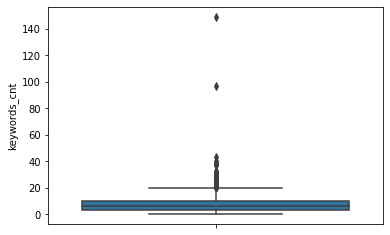

actor0_movies_cnt Type: float64
Missing: 0 (0.0%)
Mean: 7.792181757434013 (Std: 9.036894660387967)
Median: 5.0 
Min: 0.0 Max: 65.0


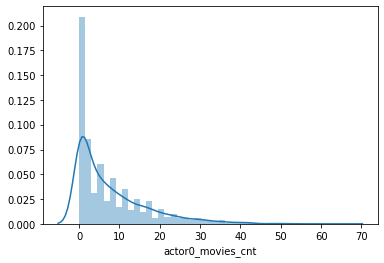

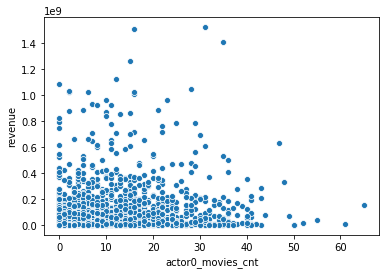

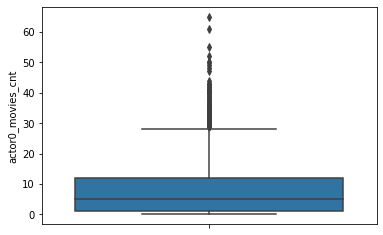

actor0_movies_5y_cnt Type: float64
Missing: 0 (0.0%)
Mean: 3.0491146007350483 (Std: 3.050624215381503)
Median: 2.0 
Min: 0.0 Max: 16.0


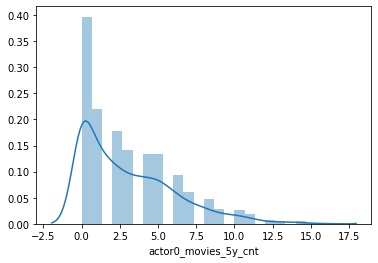

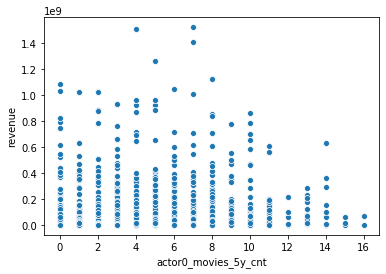

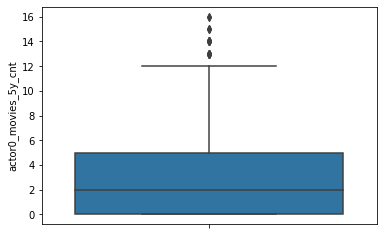

actor1_movies_cnt Type: float64
Missing: 0 (0.0%)
Mean: 5.883060474440361 (Std: 7.785957854669297)
Median: 3.0 
Min: 0.0 Max: 67.0


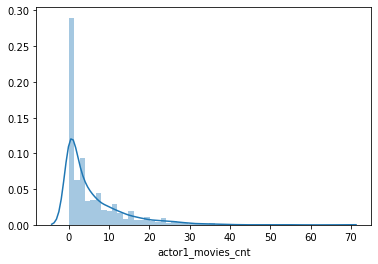

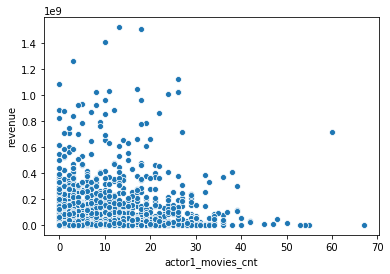

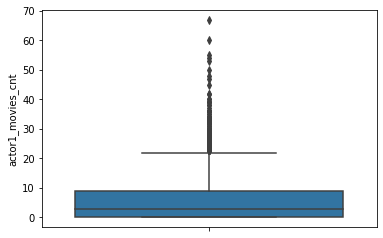

actor1_movies_5y_cnt Type: float64
Missing: 0 (0.0%)
Mean: 2.442031406615436 (Std: 2.799705991977183)
Median: 1.0 
Min: 0.0 Max: 17.0


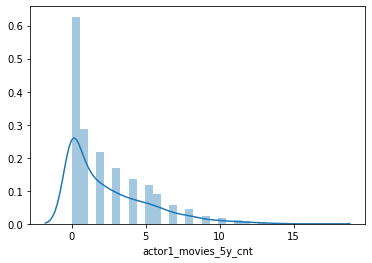

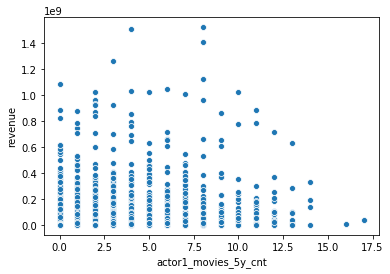

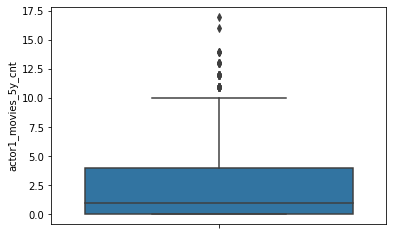

actor2_movies_cnt Type: float64
Missing: 0 (0.0%)
Mean: 5.24356832609422 (Std: 7.2625213299227935)
Median: 2.0 
Min: 0.0 Max: 62.0


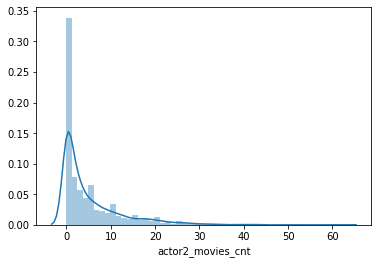

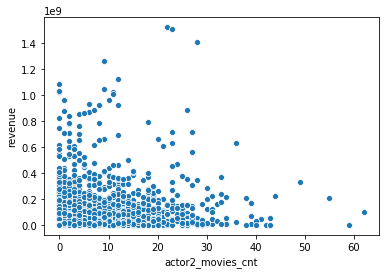

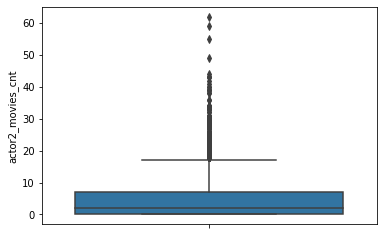

actor2_movies_5y_cnt Type: float64
Missing: 0 (0.0%)
Mean: 2.122953558302706 (Std: 2.6128235697287434)
Median: 1.0 
Min: 0.0 Max: 15.0


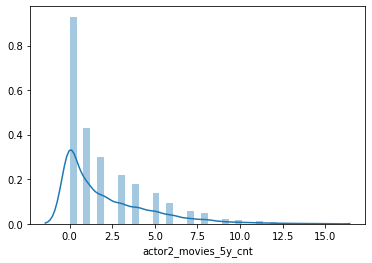

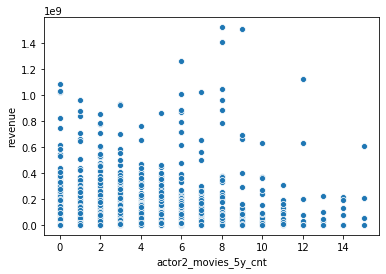

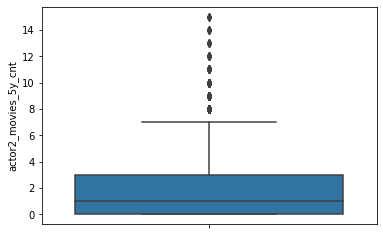

sw_female_actor0 Type: category
Missing: 147 (4.911460073504845%)


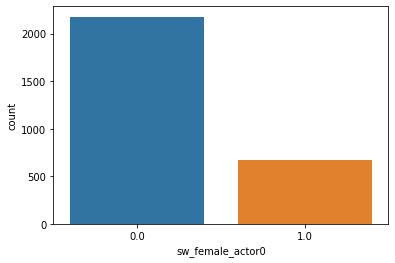

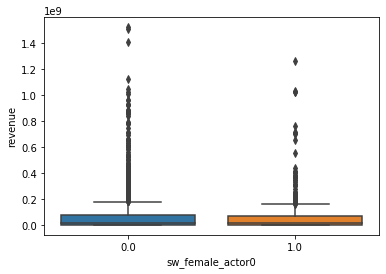

sw_female_actor1 Type: category
Missing: 68 (2.2719679251587035%)


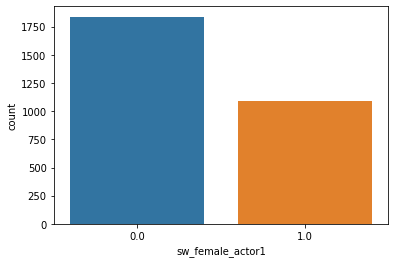

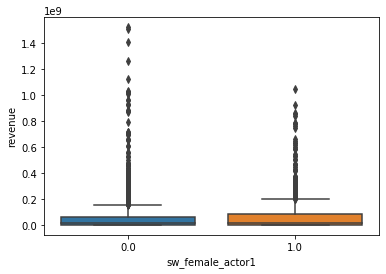

sw_female_actor2 Type: category
Missing: 71 (2.3722018042098227%)


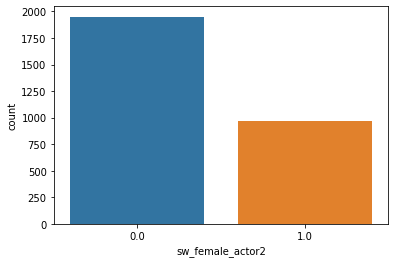

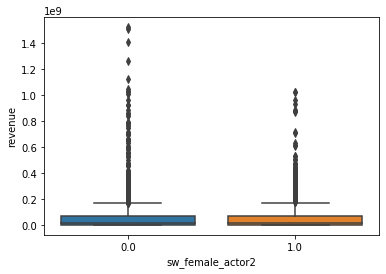

sw_male_actor0 Type: category
Missing: 147 (4.911460073504845%)


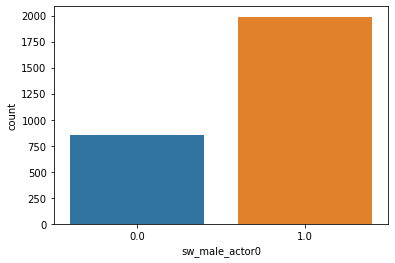

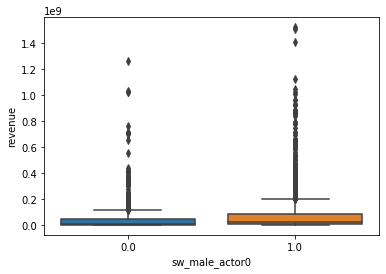

sw_male_actor1 Type: category
Missing: 68 (2.2719679251587035%)


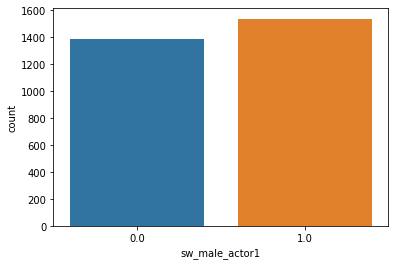

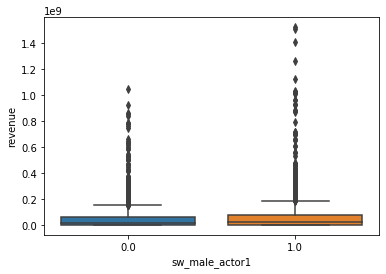

sw_male_actor2 Type: category
Missing: 71 (2.3722018042098227%)


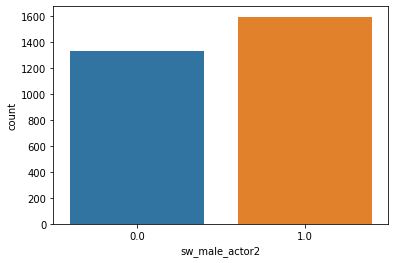

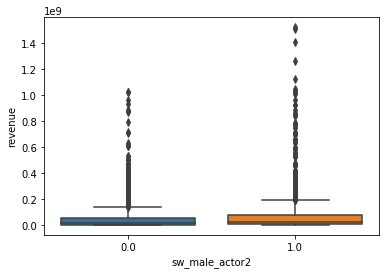

actor0_prev_revenue Type: float64
Missing: 928 (31.005679919812895%)
Mean: 220975056.35302663 (Std: 248410151.1811048)
Median: 151493655.0 
Min: 2.0 Max: 1519557910.0


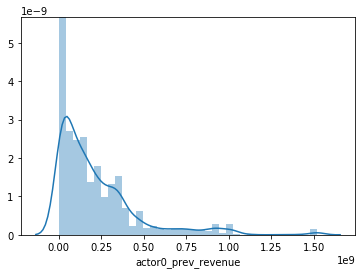

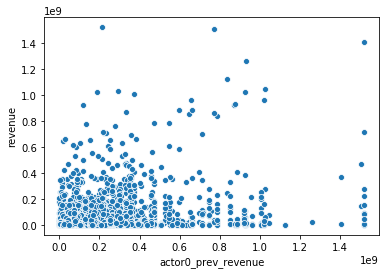

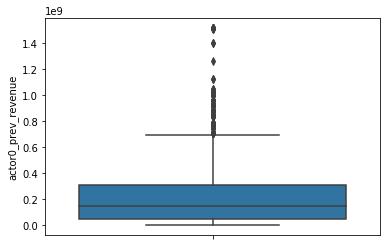

actor1_prev_revenue Type: float64
Missing: 1152 (38.4898095556298%)
Mean: 199771465.7050516 (Std: 245248913.68181208)
Median: 117719158.0 
Min: 1.0 Max: 1519557910.0


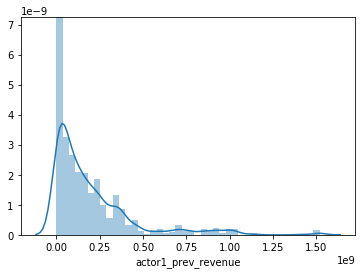

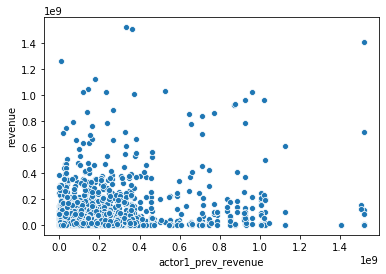

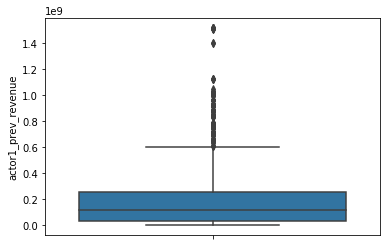

actor2_prev_revenue Type: float64
Missing: 1239 (41.39659204811226%)
Mean: 196122116.76510832 (Std: 245677054.06028944)
Median: 116400000.0 
Min: 1.0 Max: 1519557910.0


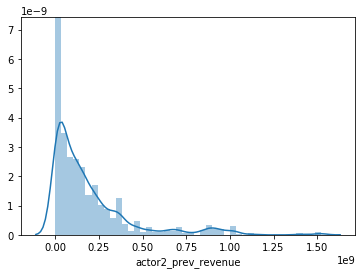

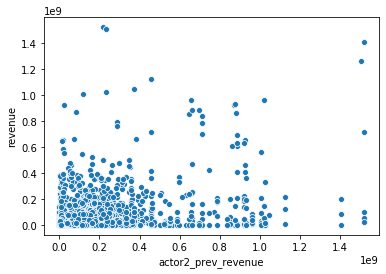

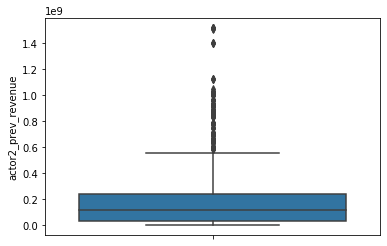

director_movies_cnt Type: float64
Missing: 0 (0.0%)
Mean: 1.933511526896091 (Std: 3.0440451304772758)
Median: 1.0 
Min: 0.0 Max: 28.0


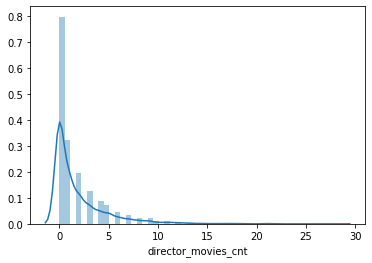

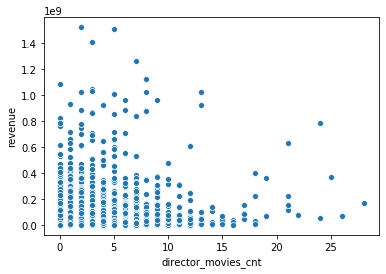

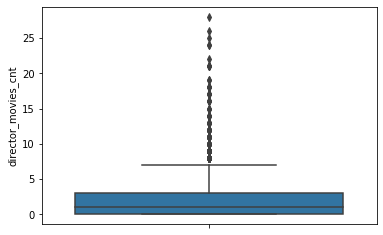

director_movies_5y_cnt Type: float64
Missing: 0 (0.0%)
Mean: 0.6531907784831273 (Std: 0.8973383868100582)
Median: 0.0 
Min: 0.0 Max: 6.0


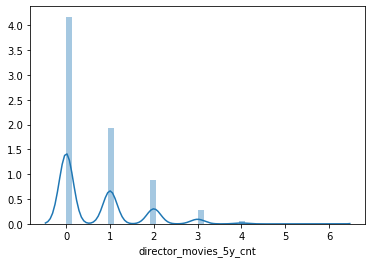

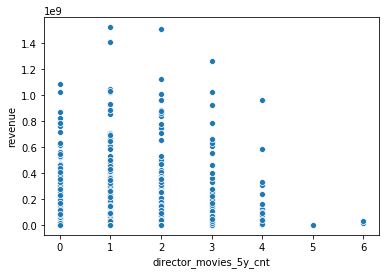

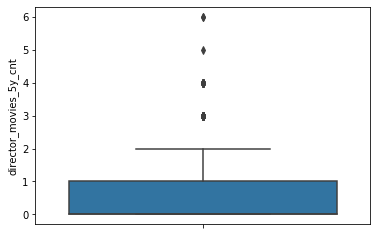

genre_adventure Type: category
Missing: 0 (0.0%)


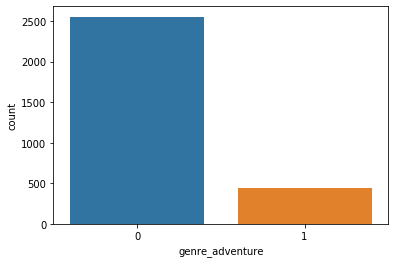

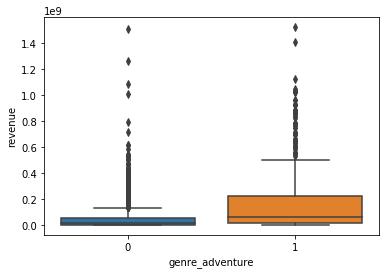

genre_fantasy Type: category
Missing: 0 (0.0%)


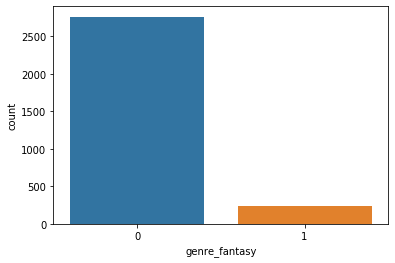

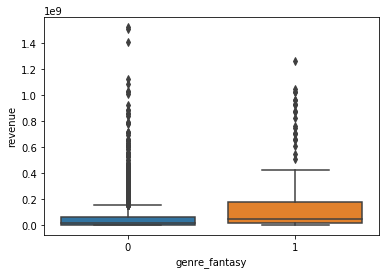

genre_animation Type: category
Missing: 0 (0.0%)


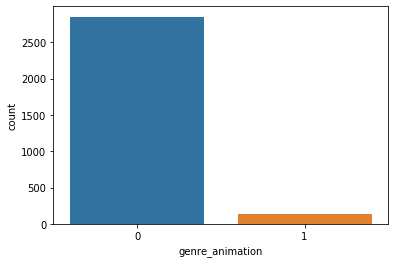

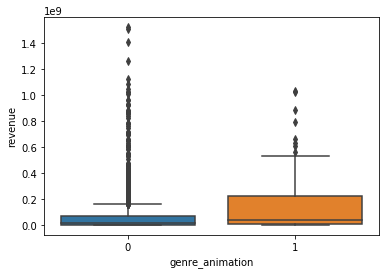

genre_drama Type: category
Missing: 0 (0.0%)


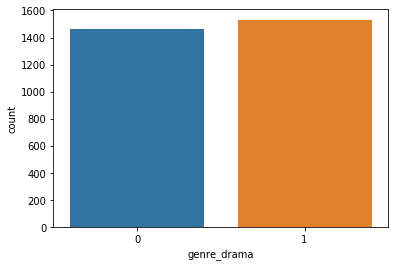

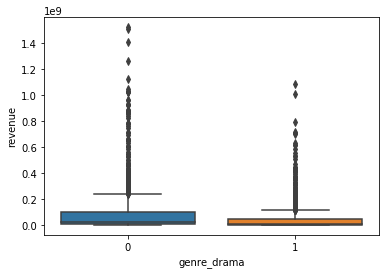

genre_horror Type: category
Missing: 0 (0.0%)


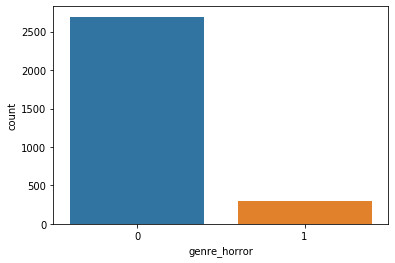

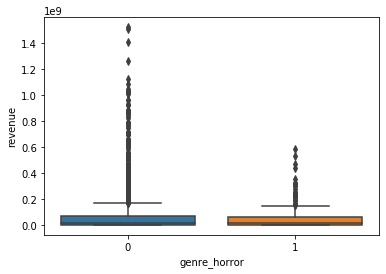

genre_action Type: category
Missing: 0 (0.0%)


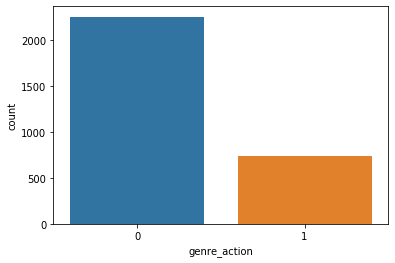

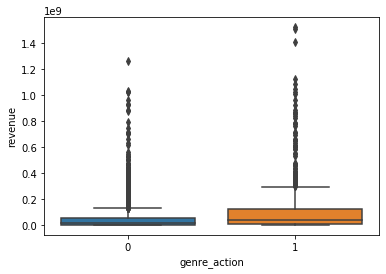

genre_comedy Type: category
Missing: 0 (0.0%)


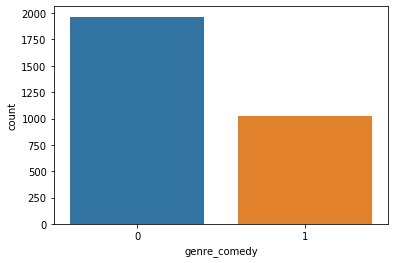

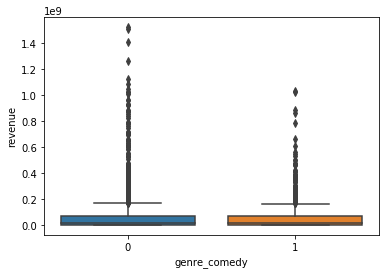

genre_history Type: category
Missing: 0 (0.0%)


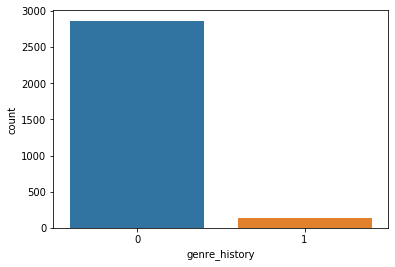

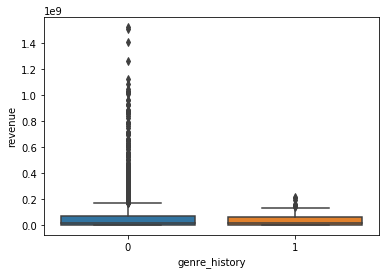

genre_western Type: category
Missing: 0 (0.0%)


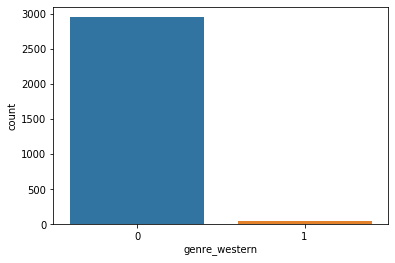

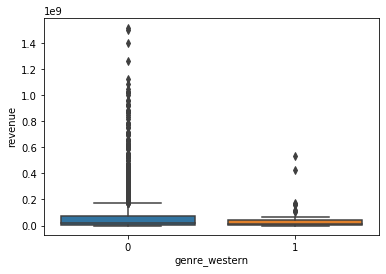

genre_thriller Type: category
Missing: 0 (0.0%)


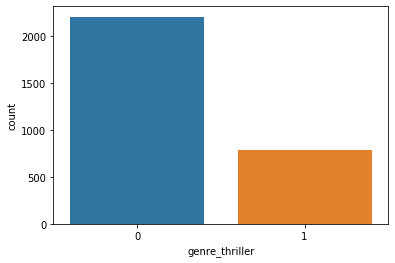

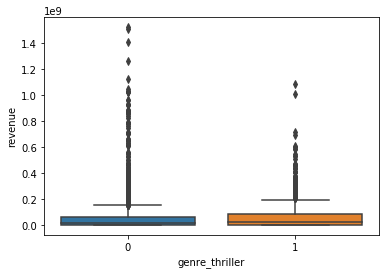

genre_crime Type: category
Missing: 0 (0.0%)


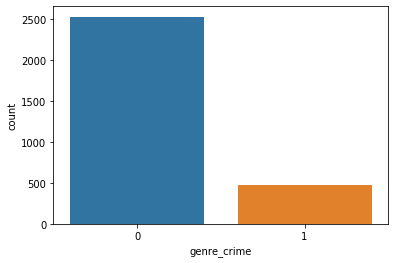

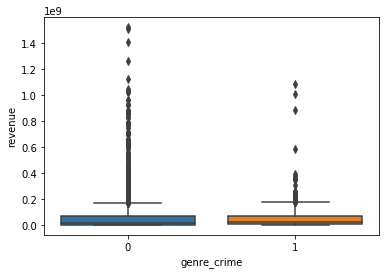

genre_documentary Type: category
Missing: 0 (0.0%)


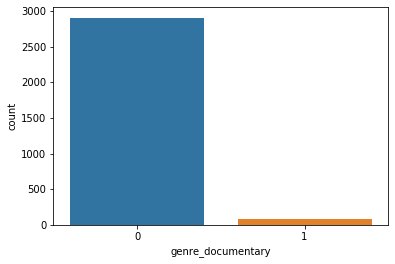

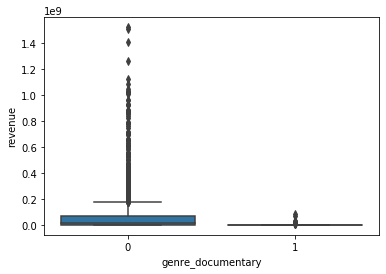

genre_science_fiction Type: category
Missing: 0 (0.0%)


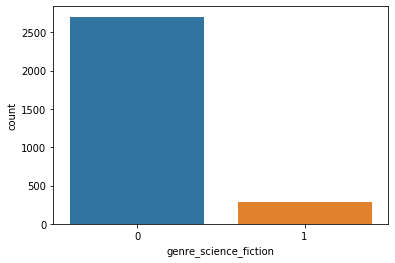

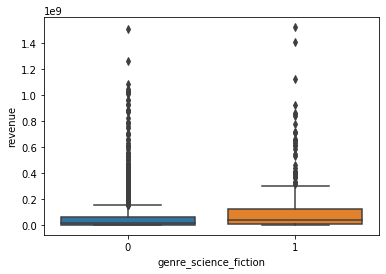

genre_mystery Type: category
Missing: 0 (0.0%)


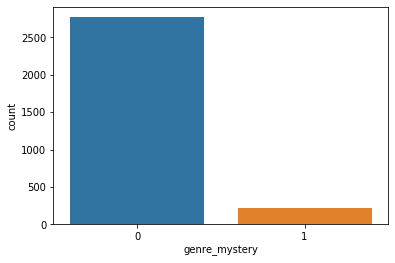

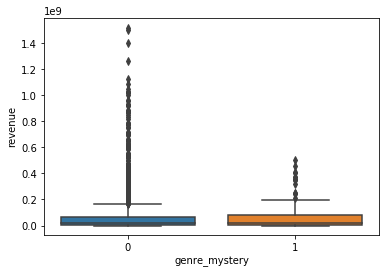

genre_music Type: category
Missing: 0 (0.0%)


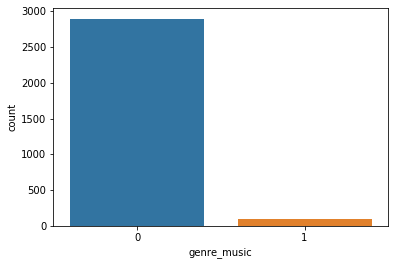

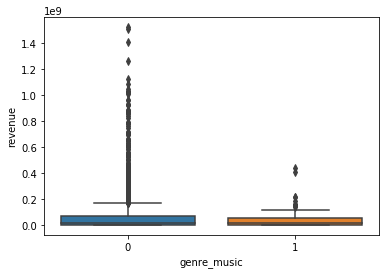

genre_romance Type: category
Missing: 0 (0.0%)


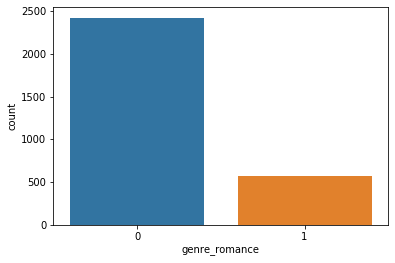

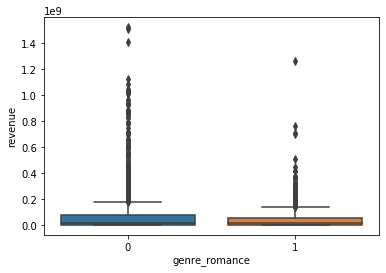

genre_family Type: category
Missing: 0 (0.0%)


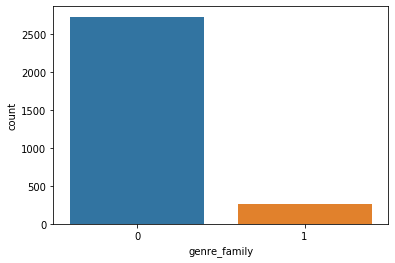

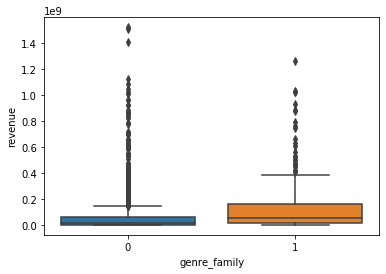

genre_war Type: category
Missing: 0 (0.0%)


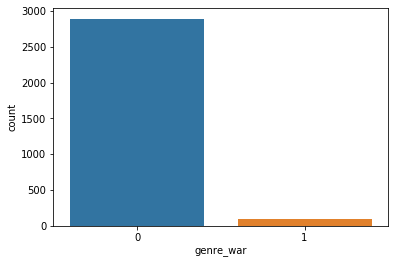

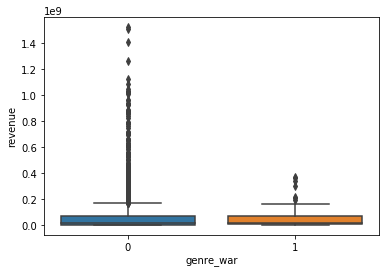

genre_foreign Type: category
Missing: 0 (0.0%)


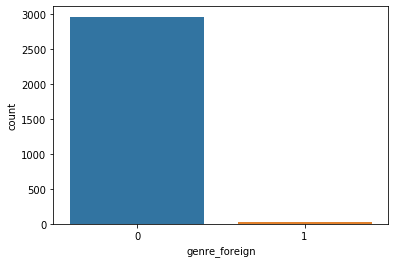

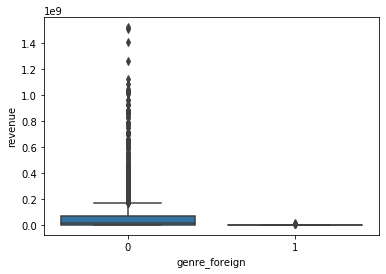

depart_Art Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 2.709536601746138 (Std: 4.046561987943222)
Median: 1.0 
Min: 0.0 Max: 28.0


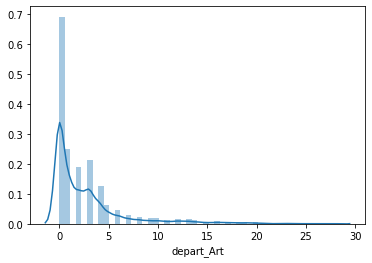

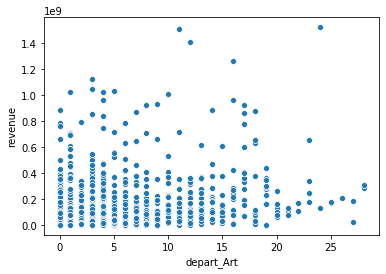

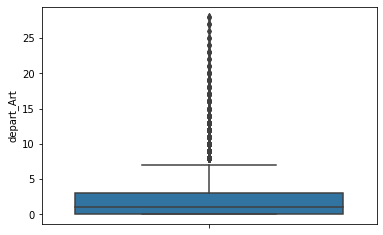

depart_Camera Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 1.8210208193418402 (Std: 2.5650439899710715)
Median: 1.0 
Min: 0.0 Max: 23.0


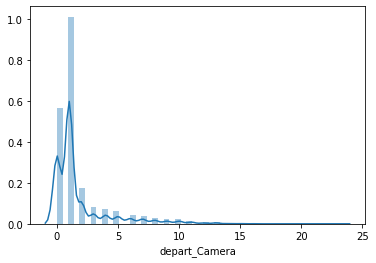

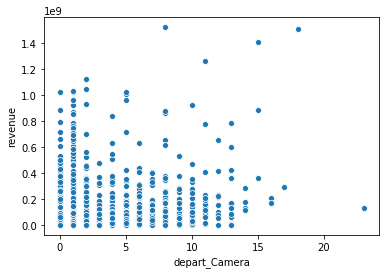

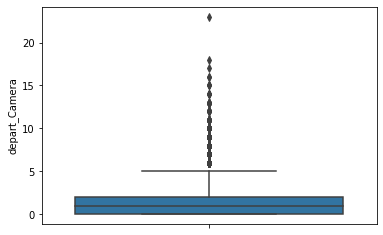

depart_Crew Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 2.4560107454667564 (Std: 6.147196487016228)
Median: 0.0 
Min: 0.0 Max: 119.0


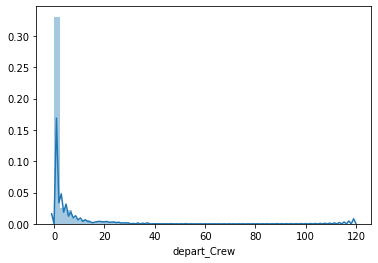

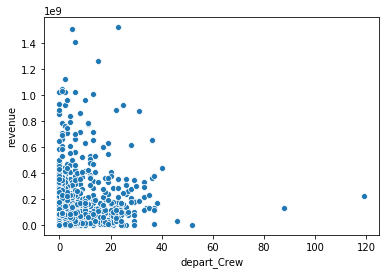

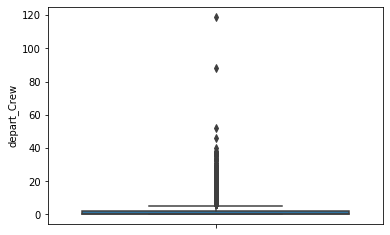

depart_Custom_Mkup Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 2.0671591672263263 (Std: 3.5193301078248127)
Median: 1.0 
Min: 0.0 Max: 33.0


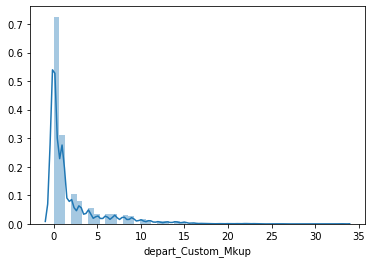

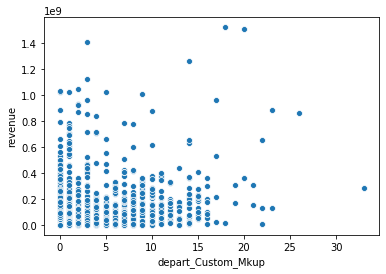

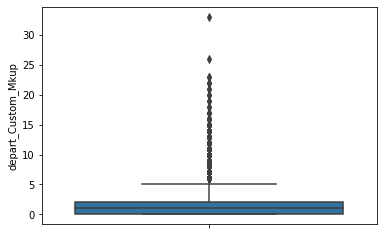

depart_Directing Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 1.661517797179315 (Std: 1.352659487667116)
Median: 1.0 
Min: 1.0 Max: 30.0


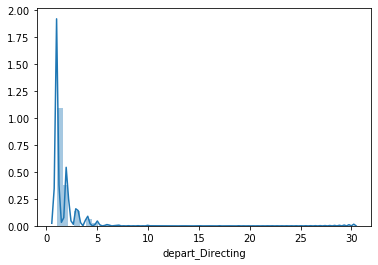

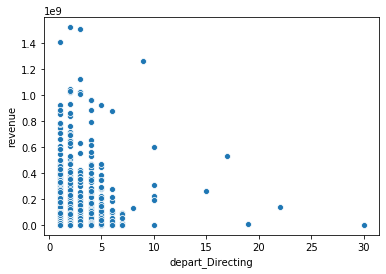

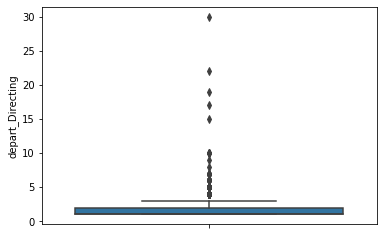

depart_Editing Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 1.5134318334452652 (Std: 1.7283596969367854)
Median: 1.0 
Min: 0.0 Max: 14.0


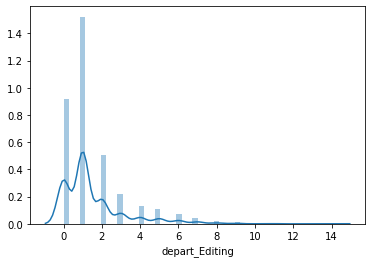

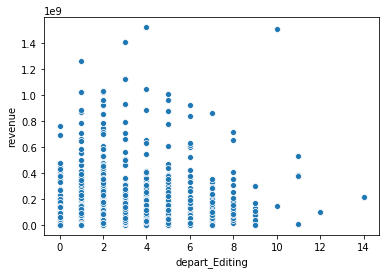

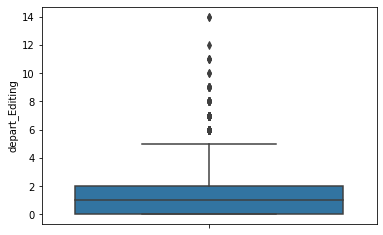

depart_Lighting Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.4375419744795164 (Std: 1.2391751312036536)
Median: 0.0 
Min: 0.0 Max: 12.0


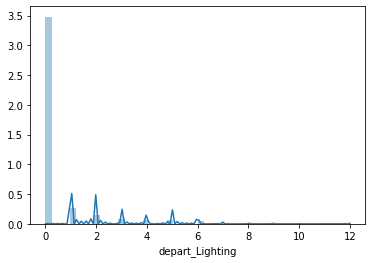

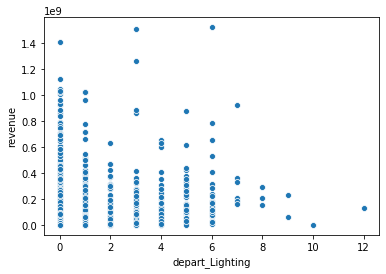

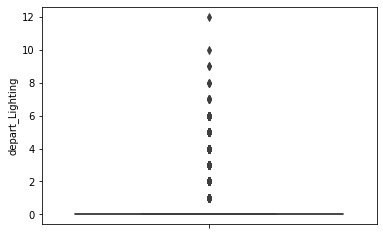

depart_Production Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 5.334452652787105 (Std: 5.265958353430345)
Median: 4.0 
Min: 0.0 Max: 34.0


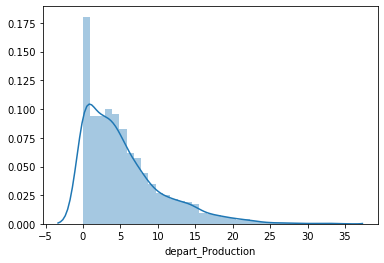

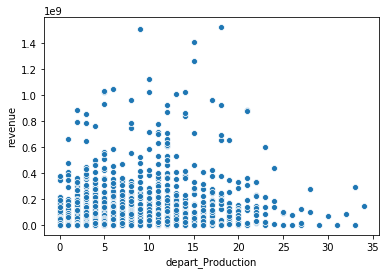

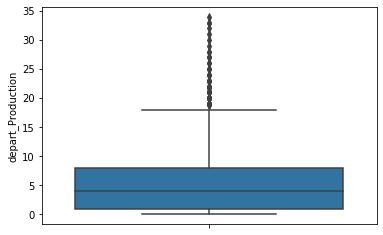

depart_Sound Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 3.128945601074547 (Std: 4.567400064326609)
Median: 1.0 
Min: 0.0 Max: 31.0


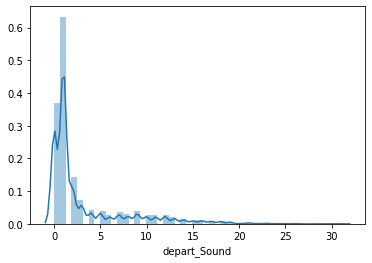

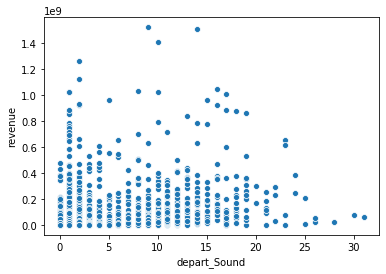

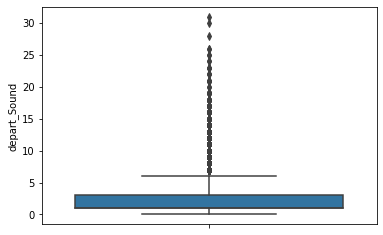

depart_Visual_Effects Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 1.2058428475486904 (Std: 3.7451925008629656)
Median: 0.0 
Min: 0.0 Max: 52.0


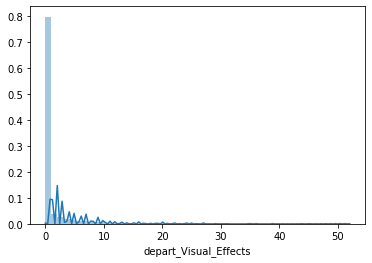

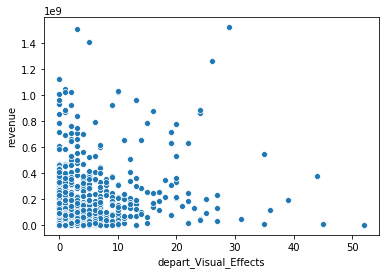

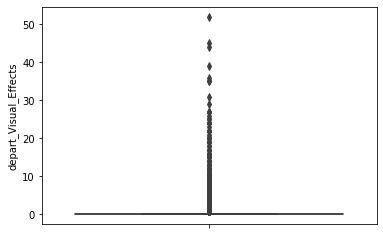

depart_Writing Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 2.2031564808596373 (Std: 1.594155958484958)
Median: 2.0 
Min: 0.0 Max: 20.0


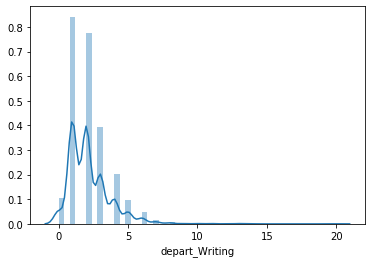

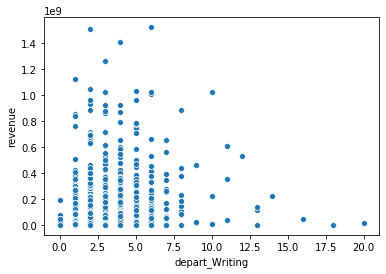

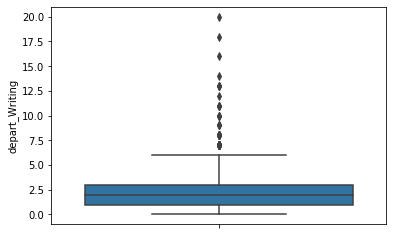

depart_Art_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.2447951645399597 (Std: 0.5802156580869924)
Median: 0.0 
Min: 0.0 Max: 6.0


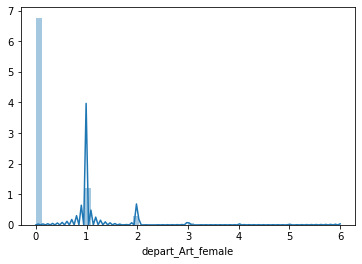

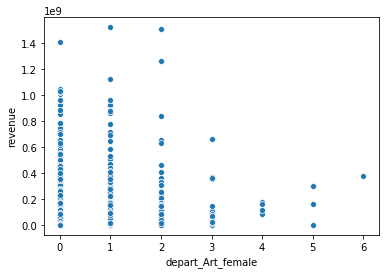

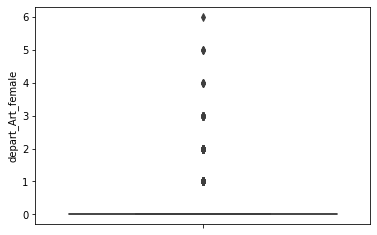

depart_Camera_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.02182672934855608 (Std: 0.15285646290324134)
Median: 0.0 
Min: 0.0 Max: 3.0


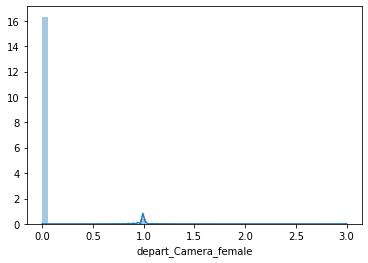

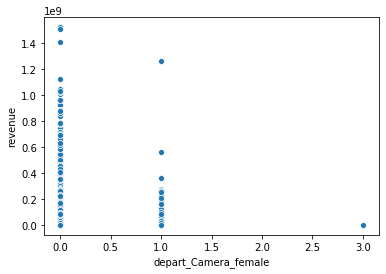

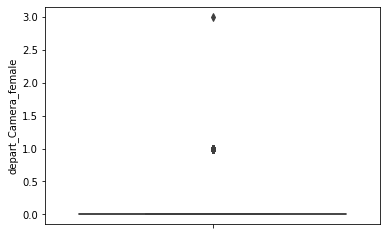

depart_Crew_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.06447280053727333 (Std: 0.37626938604144544)
Median: 0.0 
Min: 0.0 Max: 10.0


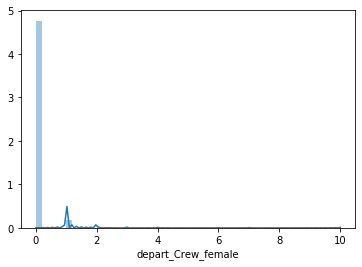

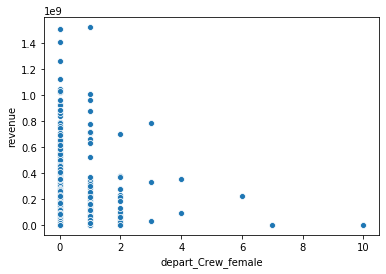

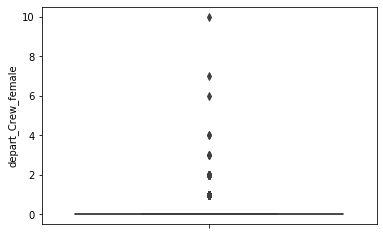

depart_Custom_Mkup_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.36064472800537273 (Std: 0.656288371450973)
Median: 0.0 
Min: 0.0 Max: 6.0


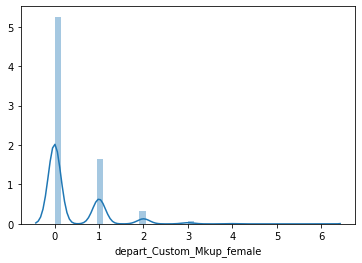

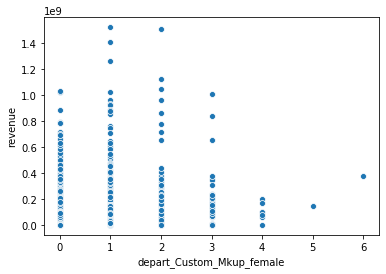

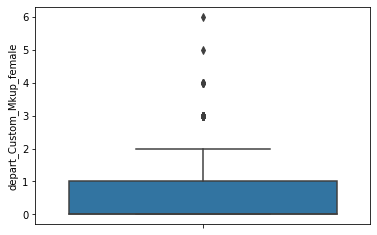

depart_Directing_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.15580926796507724 (Std: 0.39967435521474953)
Median: 0.0 
Min: 0.0 Max: 3.0


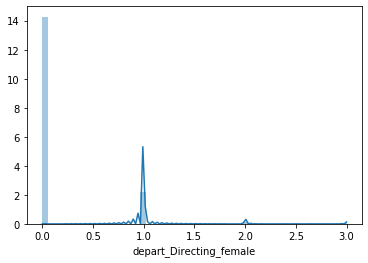

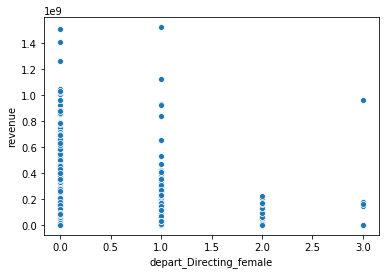

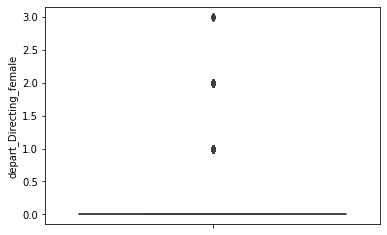

depart_Editing_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.12894560107454667 (Std: 0.3739704421486478)
Median: 0.0 
Min: 0.0 Max: 5.0


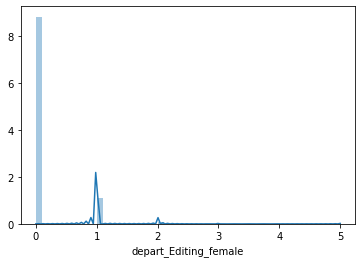

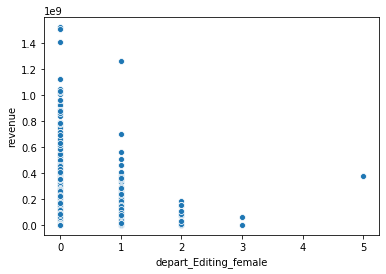

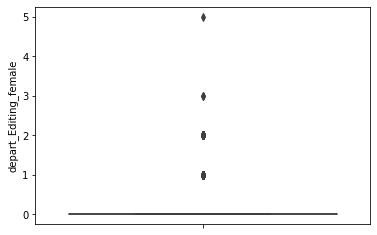

depart_Lighting_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.001343183344526528 (Std: 0.03662484406833084)
Median: 0.0 
Min: 0.0 Max: 1.0


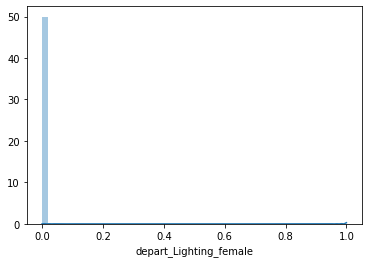

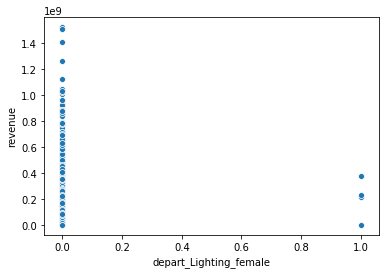

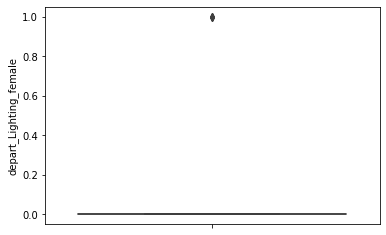

depart_Production_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.9597044996642041 (Std: 1.3544400705163684)
Median: 0.0 
Min: 0.0 Max: 12.0


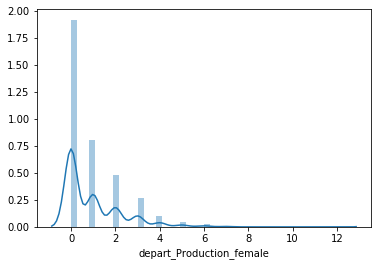

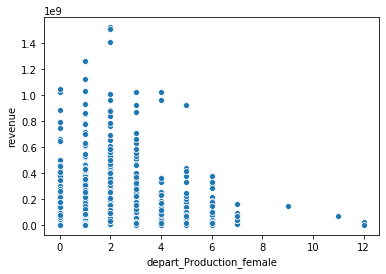

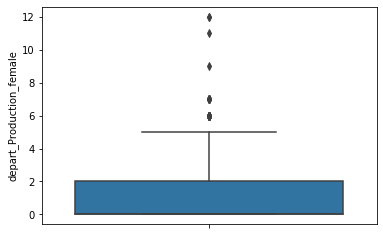

depart_Sound_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.08059100067159167 (Std: 0.3014728563053871)
Median: 0.0 
Min: 0.0 Max: 3.0


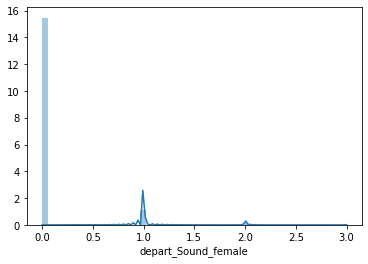

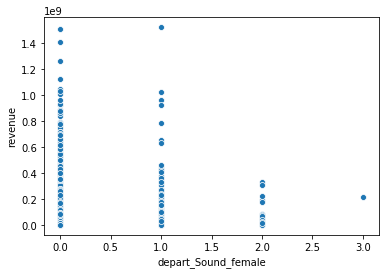

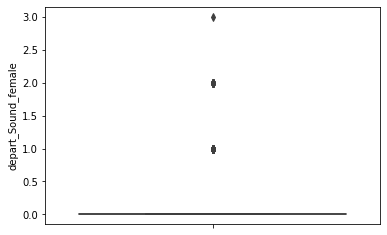

depart_Visual_Effects_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.007387508394895903 (Std: 0.08563254705198832)
Median: 0.0 
Min: 0.0 Max: 1.0


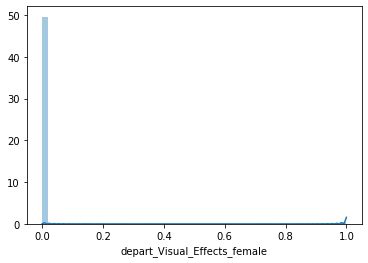

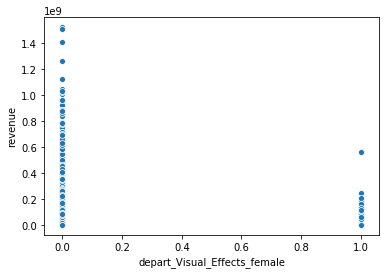

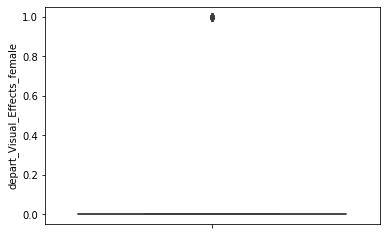

depart_Writing_female Type: float64
Missing: 15 (0.5011693952555965%)
Mean: 0.1279382135661518 (Std: 0.3948355068190314)
Median: 0.0 
Min: 0.0 Max: 3.0


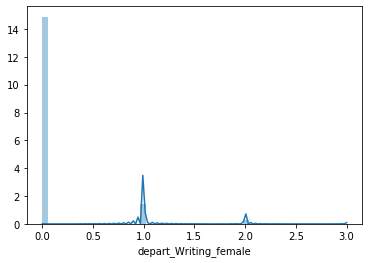

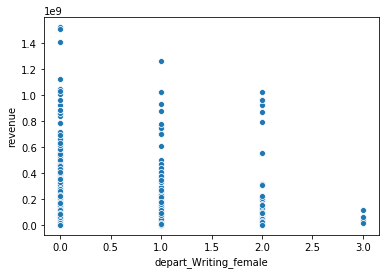

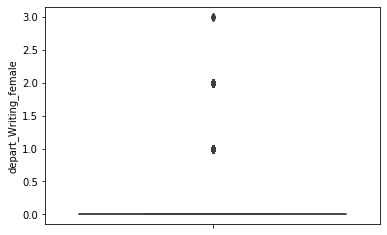

In [8]:
#Create a list for columns with more than 5% missing
high_miss_cols = []
#For part 3.2: Create a list for columns with missing
miss_cols = []
numeric_cols = []
#Creating all the plots
np.set_printoptions(precision=3, suppress=True) #precision settings
sns.boxplot(data=movies_f ,y="revenue",orient="v")
plt.show()
for column in movies_f.columns:
    var = movies_f[column]
    print (f'{column} Type: {var.dtype}')
    missing = var.isna().sum()
    total = len(var)
    if missing/total > 0.05:
        high_miss_cols.append(column)
    if missing/total > 0:
        miss_cols.append(column)
    print (f'Missing: {missing} ({missing/total*100}%)')
    if str(var.dtype) != 'category':
        numeric_cols.append(column)
        mean = np.mean(var)
        median = np.median(var.dropna())
        std = np.std(var)
        minimum = np.min(var)
        maximum = np.max(var)
        print (f'Mean: {mean} (Std: {std})')
        print (f'Median: {median} ')
        print (f'Min: {minimum} Max: {maximum}')
        sns.distplot(var.dropna())
        plt.show()
        sns.scatterplot(data=movies_f,x=column, y="revenue")
        plt.show()
        sns.boxplot(data=movies_f, y=column, orient="v")
        plt.show()

    else:
        sns.countplot(var.dropna())
        plt.show()        
        sns.boxplot(data=movies_f, x=column,y="revenue",orient="v")
        plt.show()

# 2.3

In [9]:
# calculate the correlation matrix - 
corr = movies_f.corr(method = 'spearman')
pd.set_option('display.max_columns', None)
corr

movie_id    budget  popularity   revenue  \
movie_id                      1.000000  0.019088   -0.007484  0.009998   
budget                        0.019088  1.000000    0.508642  0.691008   
popularity                   -0.007484  0.508642    1.000000  0.594539   
revenue                       0.009998  0.691008    0.594539  1.000000   
keyword_cnt                  -0.011512  0.263156    0.423106  0.332267   
seasonality                   0.023537  0.137303    0.095596  0.199013   
sw_collection                 0.023610  0.091340    0.089268  0.094416   
producers_cnt                 0.006610  0.280401    0.261442  0.196468   
countries_cnt                -0.012406  0.152338    0.170403  0.086479   
keywords_cnt                 -0.011512  0.263156    0.423106  0.332267   
actor0_movies_cnt            -0.005185  0.425809    0.338451  0.349343   
actor0_movies_5y_cnt          0.005935  0.406023    0.328448  0.334067   
actor1_movies_cnt             0.025205  0.426737    0.324271  0.321241   
actor1_movies_5y_cnt          0.025498  0.396833    0.315693  0.316476   
actor2_movies_cnt             0.015573  0.384755    0.310340  0.294976   
actor2_movies_5y_cnt          0.032055  0.380520    0.315469  0.304559   
actor0_prev_revenue           0.017915  0.365370    0.279529  0.273818   
actor1_prev_revenue           0.016856  0.297688    0.230384  0.208298   
actor2_prev_revenue           0.014395  0.240529    0.220340  0.155630   
director_movies_cnt           0.032055  0.416258    0.318228  0.372715   
director_movies_5y_cnt        0.031591  0.329922    0.266913  0.340705   
depart_Art                   -0.001512  0.396655    0.419687  0.386274   
depart_Camera                 0.019356  0.329711    0.405594  0.355154   
depart_Crew                   0.008184  0.331545    0.336366  0.321260   
depart_Custom_Mkup           -0.008290  0.343433    0.372816  0.334918   
depart_Directing              0.010557  0.267661    0.290437  0.261572   
depart_Editing                0.002869  0.372444    0.438496  0.404667   
depart_Lighting              -0.015516  0.292355    0.320444  0.289331   
depart_Production             0.018985  0.404704    0.454537  0.396641   
depart_Sound                  0.025981  0.357557    0.431434  0.391170   
depart_Visual_Effects        -0.021856  0.395000    0.362985  0.368415   
depart_Writing                0.001639  0.267828    0.294975  0.274986   
depart_Art_female            -0.006237  0.248244    0.214668  0.239779   
depart_Camera_female          0.012686  0.051202    0.072760  0.032006   
depart_Crew_female           -0.021745  0.164207    0.172993  0.162830   
depart_Custom_Mkup_female     0.014329  0.333864    0.276313  0.317689   
depart_Directing_female      -0.019761  0.138520    0.117035  0.126197   
depart_Editing_female         0.001888  0.072671    0.082930  0.058297   
depart_Lighting_female       -0.002474  0.024348    0.032102  0.031355   
depart_Production_female      0.022169  0.406694    0.391704  0.387482   
depart_Sound_female          -0.019082  0.128165    0.148980  0.141174   
depart_Visual_Effects_female  0.007604  0.076773    0.059349  0.077061   
depart_Writing_female        -0.020831  0.071751    0.084460  0.099745   

                              keyword_cnt  seasonality  sw_collection  \
movie_id                        -0.011512     0.023537       0.023610   
budget                           0.263156     0.137303       0.091340   
popularity                       0.423106     0.095596       0.089268   
revenue                          0.332267     0.199013       0.094416   
keyword_cnt                      1.000000     0.059826       0.029213   
seasonality                      0.059826     1.000000      -0.000486   
sw_collection                    0.029213    -0.000486       1.000000   
producers_cnt                    0.137230    -0.010031       0.121878   
countries_cnt                    0.114178     0.009604       0.070373   
keywords_cnt                     1.000000  

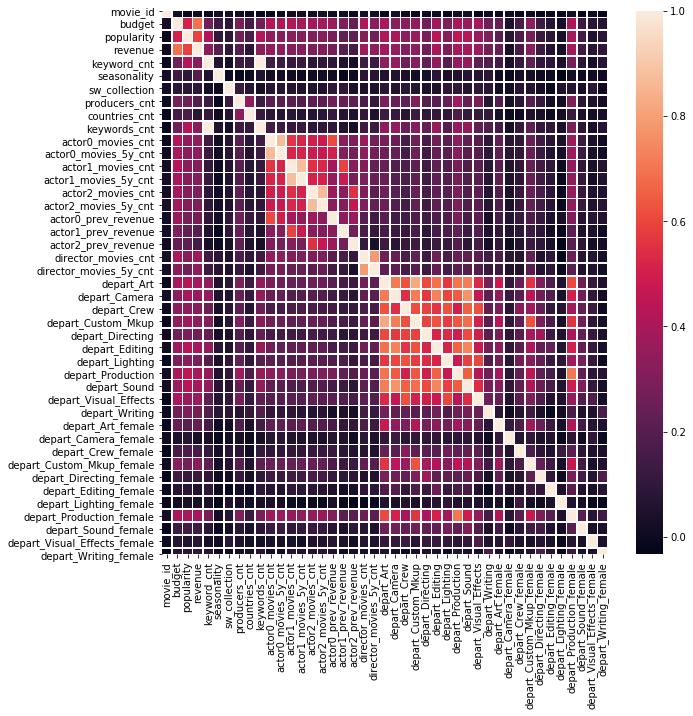

In [10]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.5, ax=ax)
plt.show()

Here we can see that we have the same variable twice: keyword_cnt and keywords_cnt. So we will drop one of them.

# 2.4
# :משתנה המטרה - הרווח

.בהיסטוגרמה של משתנה המטרה ניתן לראות שהרווח לא מתפלג נורמלית

גם בבוקס פלוט של ערכי הרווח בכל קטגוריה של המשתנים הקטגוריאליים ניתן לראות שהחציון והתוחלת לא קרובים זה לזה,

.מה שתומך בכך שככל הנראה הרווח אינו מתפלג נורמלית

# :שוני בהתפלגות  משתנה המטרה במשתנים קטגוריאליים 

. אין סרטים ללא פוסטר. נתוני המשתנה לא מאוזנים באופן חריג,עלינו להשמיט אותו- sw_has_poster

:במשתנים הבאים ניתן לראות שפיזור ערכי הרווח מעט שונה בין הקטגוריות

runtime_cat

sw_tagline

sw_web_presence

כמו כן, נראה שיכול להיות הבדל בהתפלגות עבור המשתנים הקטגוריאליים של הז'אנרים, שפת הסרטים ומין השחקן.

.נבחן זאת מקרוב ע"י גרף התפלגות של 2 הקטגוריות אחד על השני

In [11]:
cat_dist = ['runtime_cat', 'sw_tagline', 'sw_web_presence',
            'lang_US' ,'lang_FR','lang_RU','lang_ES','lang_JA',
            'sw_female_actor0','sw_female_actor1','sw_female_actor2','sw_male_actor0','sw_male_actor1','sw_male_actor2',
            'genre_adventure','genre_fantasy','genre_animation','genre_drama','genre_horror','genre_action',
            'genre_comedy','genre_history','genre_western','genre_thriller','genre_crime','genre_documentary',
            'genre_science_fiction','genre_mystery','genre_music','genre_romance','genre_family','genre_war','genre_foreign']

runtime_cat, unique values: ['Short', 'Medium', 'Large']


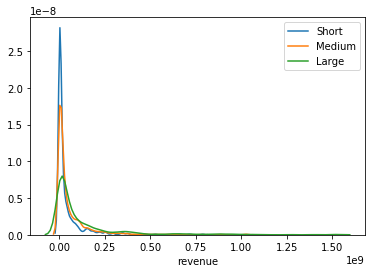

sw_tagline, unique values: [1, 0]


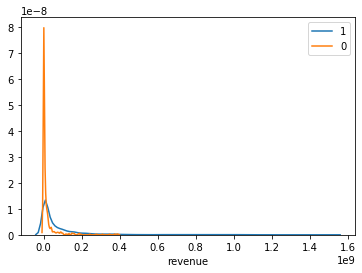

p-value:3.3535426106834806e-64
-------------------------
sw_web_presence, unique values: [0, 1]


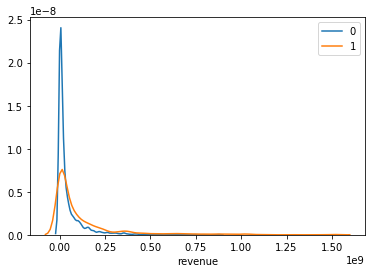

p-value:2.9712347417267728e-27
-------------------------
lang_US, unique values: [1, 0]


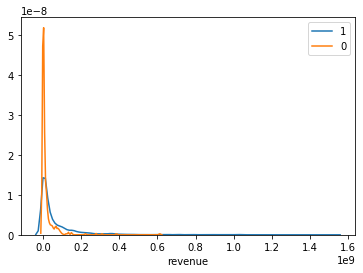

p-value:3.3275547448521006e-45
-------------------------
lang_FR, unique values: [0, 1]


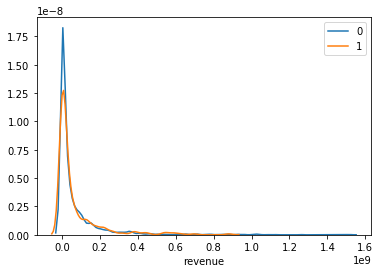

p-value:0.7243517033211985
-------------------------
lang_RU, unique values: [0, 1]


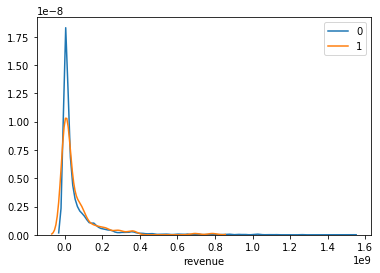

p-value:0.6473516931705698
-------------------------
lang_ES, unique values: [0, 1]


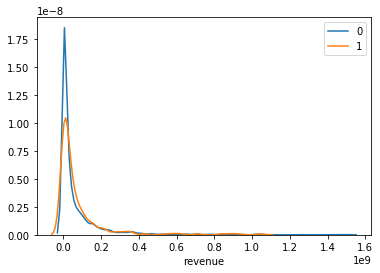

p-value:0.24045457618337324
-------------------------
lang_JA, unique values: [0, 1]


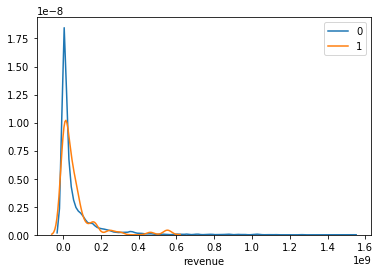

p-value:0.8120367392823675
-------------------------
sw_female_actor0, unique values: [0.0, 1.0]


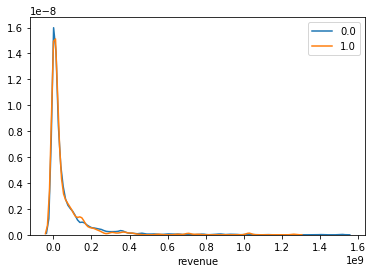

p-value:0.04490103714604417
-------------------------
sw_female_actor1, unique values: [0.0, 1.0]


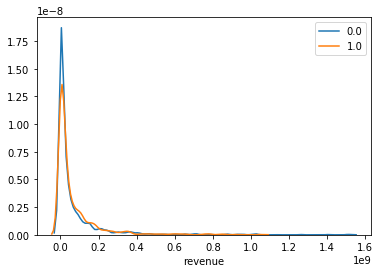

p-value:0.5057194854735484
-------------------------
sw_female_actor2, unique values: [0.0, 1.0]


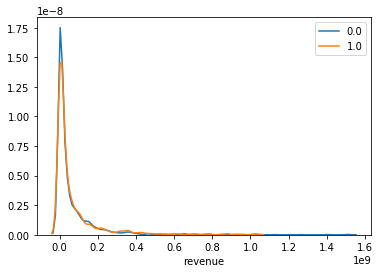

p-value:0.8589432075302713
-------------------------
sw_male_actor0, unique values: [1.0, 0.0]


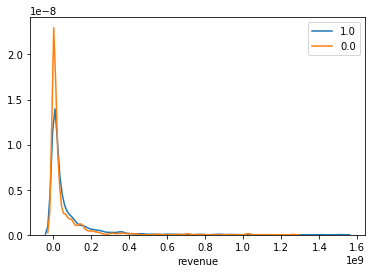

p-value:2.0007845020414806e-07
-------------------------
sw_male_actor1, unique values: [1.0, 0.0]


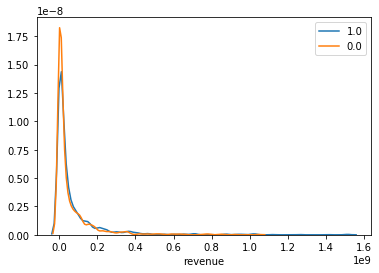

p-value:0.0019573679106394647
-------------------------
sw_male_actor2, unique values: [1.0, 0.0]


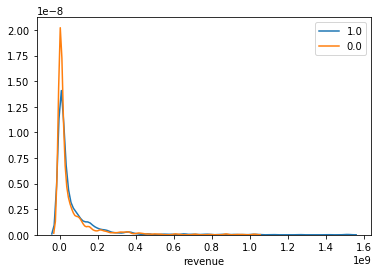

p-value:0.00039097539666700524
-------------------------
genre_adventure, unique values: [0, 1]


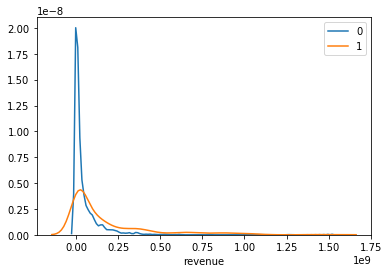

p-value:1.1969320190781976e-22
-------------------------
genre_fantasy, unique values: [0, 1]


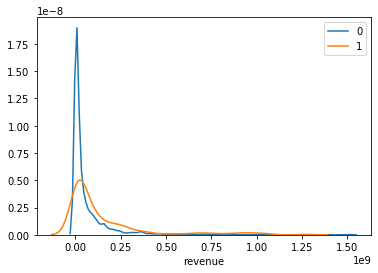

p-value:6.417290458881937e-08
-------------------------
genre_animation, unique values: [0, 1]


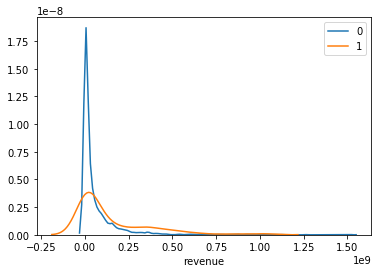

p-value:7.74526507235337e-06
-------------------------
genre_drama, unique values: [0, 1]


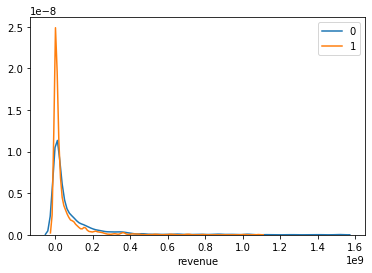

p-value:4.55527316497823e-18
-------------------------
genre_horror, unique values: [0, 1]


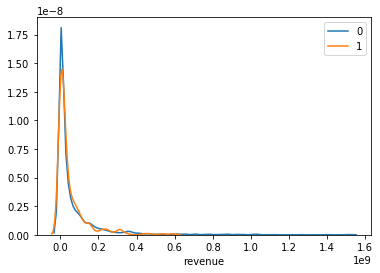

p-value:0.006145495683479844
-------------------------
genre_action, unique values: [0, 1]


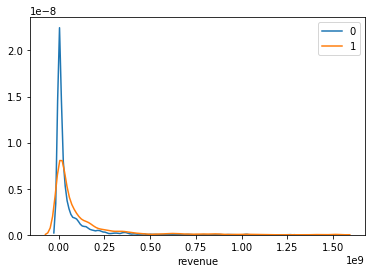

p-value:2.5776985639517705e-14
-------------------------
genre_comedy, unique values: [1, 0]


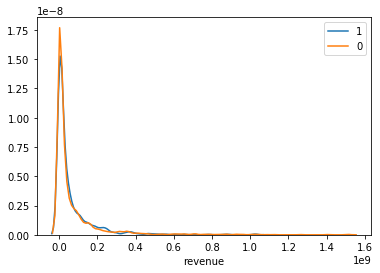

p-value:0.0570691943940393
-------------------------
genre_history, unique values: [0, 1]


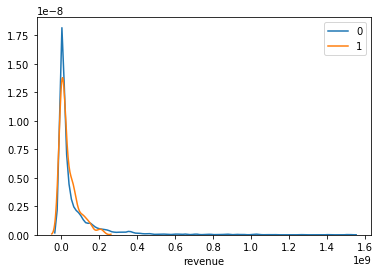

p-value:5.905991110297472e-09
-------------------------
genre_western, unique values: [0, 1]


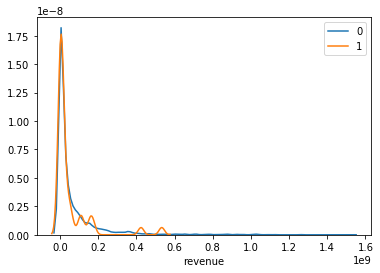

p-value:0.3467445115598101
-------------------------
genre_thriller, unique values: [0, 1]


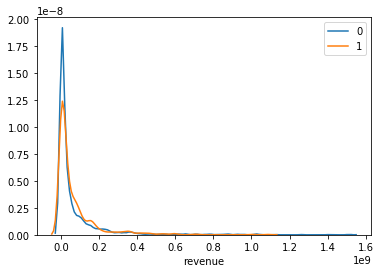

p-value:0.7014576811407831
-------------------------
genre_crime, unique values: [0, 1]


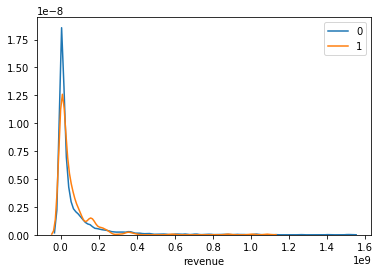

p-value:0.11969545598229185
-------------------------
genre_documentary, unique values: [0, 1]


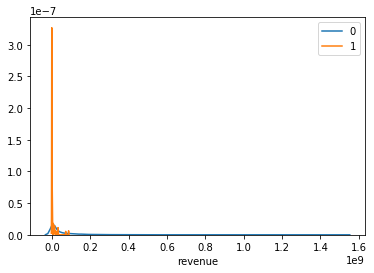

p-value:2.2896813256319677e-88
-------------------------
genre_science_fiction, unique values: [0, 1]


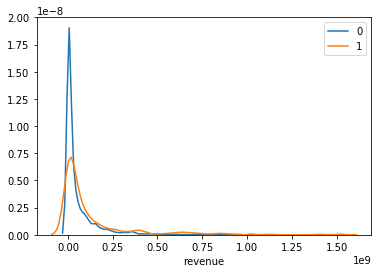

p-value:4.064847901839012e-06
-------------------------
genre_mystery, unique values: [0, 1]


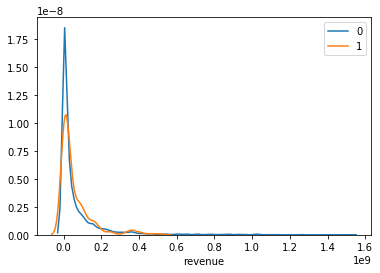

p-value:0.23474520724394138
-------------------------
genre_music, unique values: [0, 1]


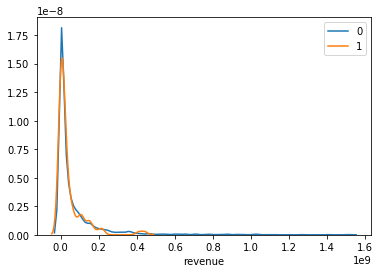

p-value:0.002169713581102752
-------------------------
genre_romance, unique values: [0, 1]


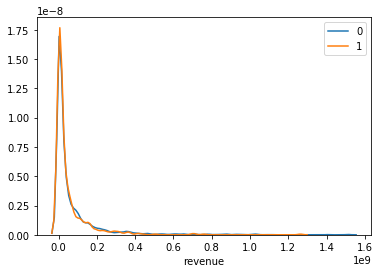

p-value:0.0009086849494591547
-------------------------
genre_family, unique values: [0, 1]


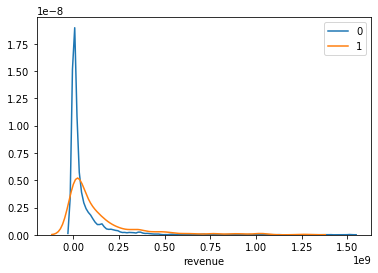

p-value:7.801682140976619e-09
-------------------------
genre_war, unique values: [0, 1]


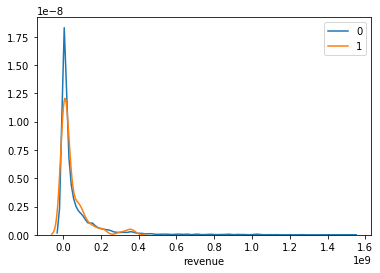

p-value:0.03429582560559073
-------------------------
genre_foreign, unique values: [0, 1]


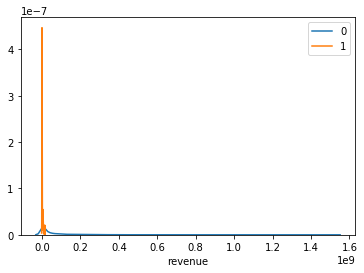

p-value:1.2066413752949403e-123
-------------------------


In [12]:
ttest_signi = []
for column in cat_dist:
    var = movies_f[column]
    unique_var = var.dropna().unique()
    print (f'{column}, unique values: {list(unique_var)}')
    for val in unique_var:
        sns.distplot(movies_f['revenue'][var==val], hist=False,
                    kde_kws = {'label':val})
    plt.show()
    if len(unique_var) == 2:
        #The variable val still exists, even though we are out of the for-loop. It contains the last unique value of the variable
        t, p = ttest_ind(movies_f['revenue'][var==val], movies_f['revenue'][var!=val], equal_var=False)
        print (f'p-value:{p}\n-------------------------')
        if p < 0.045:
            ttest_signi.append(column)

# לפי התוצאות של המבחן הסטטיסטית אלו המשתנים הקטגוריאליים שבהם יש שוני בהתפלגות משתנה המטרה:

In [13]:
print (ttest_signi)

['sw_tagline', 'sw_web_presence', 'lang_US', 'sw_female_actor0', 'sw_male_actor0', 'sw_male_actor1', 'sw_male_actor2', 'genre_adventure', 'genre_fantasy', 'genre_animation', 'genre_drama', 'genre_horror', 'genre_action', 'genre_history', 'genre_documentary', 'genre_science_fiction', 'genre_music', 'genre_romance', 'genre_family', 'genre_war', 'genre_foreign']


# 2.5
## :הגרפים שעוזרים לאתר נתוני קיצון

מכיוון שבינתיים ראינו שרוב המשתנים לא מתפלגים נורמלית

:על מנת לאתר את נתוני הקיצון שלהם נשתמש בשיטה עבור נתונים א-פרמטרים

IQR based Extreme Value Analysis - Boxplot (Whiskers boxes)

Median ± (IQR * 1.5)

### :עבור המשתנים הרציפים

בסעיף 2.2 בוקס פלוט של ערכי המשתנה

### :עבור המשתנים הקטגוריאליים

בוקס פלוט לערכי משתנה המטרה (רווח) בכל קטגוריה הקיימת במשתנה המסביר

# 2.6
# :תיאור הנתונים החסרים

.בסעיף 2.2, עבור כל משתנה, חושב מספר ואחוז הנתונים החסרים

:המשתנים בהם יש יותר מ5% נתונים חסרים

In [14]:
high_miss_cols

['actor0_prev_revenue', 'actor1_prev_revenue', 'actor2_prev_revenue']

# 2.7

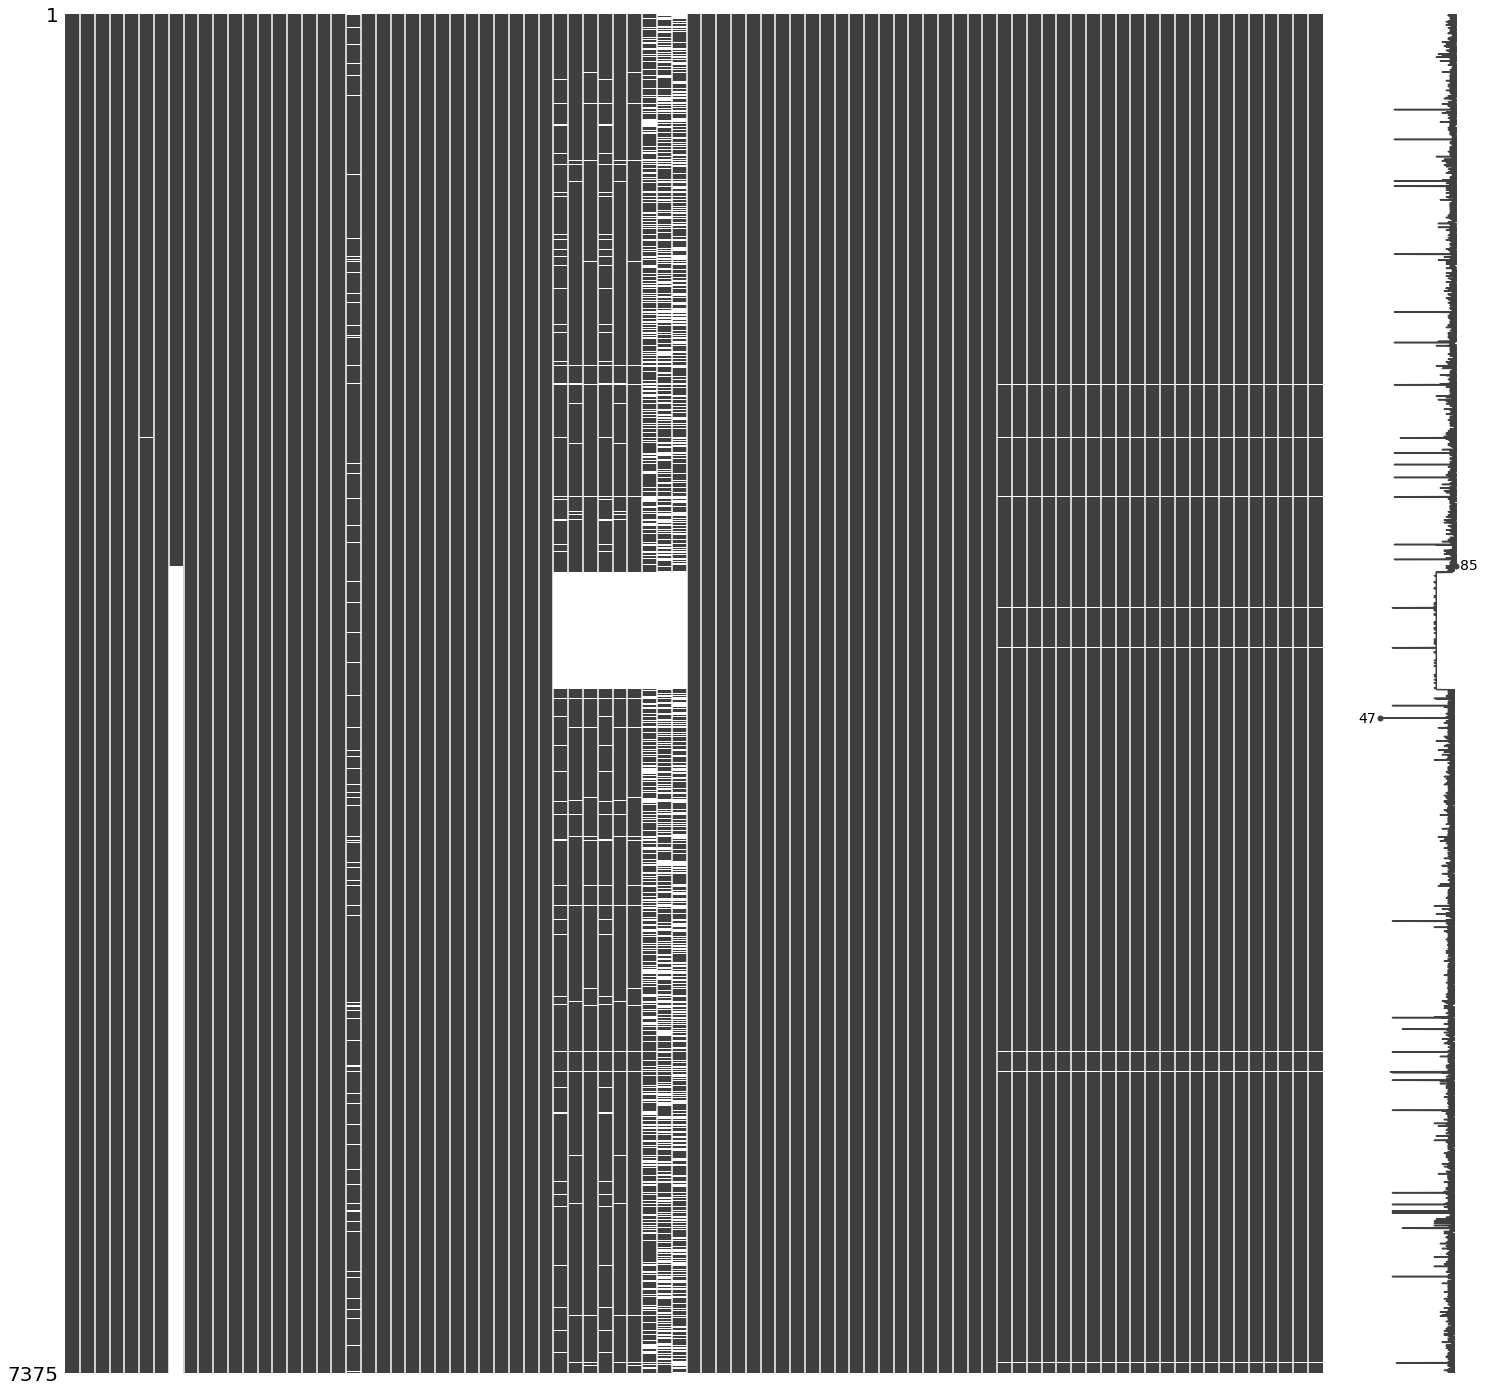

In [15]:
msno.matrix(movies_ff,figsize=(25,25))

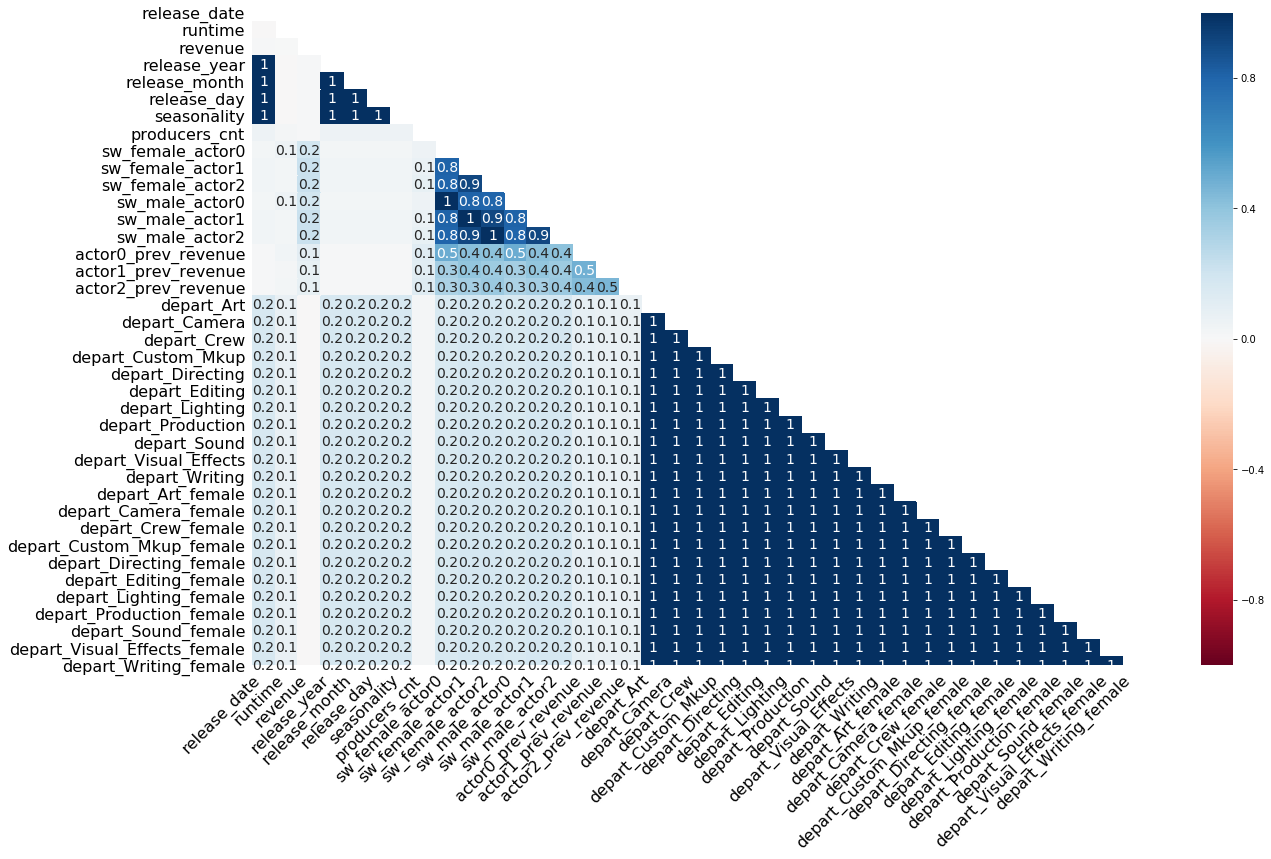

In [16]:
msno.heatmap(movies_ff)

# 3

## 3.1
### 1

In [17]:
def is_outlier (series,iqr_const=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return np.abs(series-series.median())>(iqr_const*iqr)

In [18]:
cols_with_outliers = []
for column in movies_f.columns:
    var = movies_f[column]
    if str(var.dtype) != 'category':
        sum_outlier = is_outlier(var).sum()
        #print(f'sum : {sum_outlier}')
        if sum_outlier>1:
            cols_with_outliers.append(column)

In [19]:
# This is the list of columns that have outliers
cols_with_outliers

['budget',
 'popularity',
 'revenue',
 'keyword_cnt',
 'sw_collection',
 'producers_cnt',
 'countries_cnt',
 'keywords_cnt',
 'actor0_movies_cnt',
 'actor0_movies_5y_cnt',
 'actor1_movies_cnt',
 'actor1_movies_5y_cnt',
 'actor2_movies_cnt',
 'actor2_movies_5y_cnt',
 'actor0_prev_revenue',
 'actor1_prev_revenue',
 'actor2_prev_revenue',
 'director_movies_cnt',
 'director_movies_5y_cnt',
 'depart_Art',
 'depart_Camera',
 'depart_Crew',
 'depart_Custom_Mkup',
 'depart_Directing',
 'depart_Editing',
 'depart_Lighting',
 'depart_Production',
 'depart_Sound',
 'depart_Visual_Effects',
 'depart_Writing',
 'depart_Art_female',
 'depart_Camera_female',
 'depart_Crew_female',
 'depart_Custom_Mkup_female',
 'depart_Directing_female',
 'depart_Editing_female',
 'depart_Lighting_female',
 'depart_Production_female',
 'depart_Sound_female',
 'depart_Visual_Effects_female',
 'depart_Writing_female']

budget


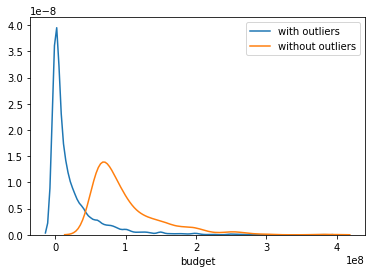

p-value:8.408249149293233e-110
-------------------------
popularity


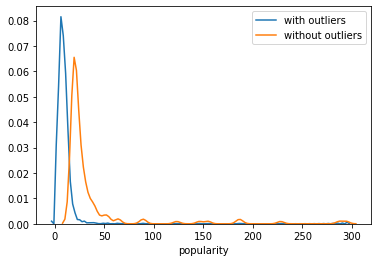

p-value:9.827921180614838e-11
-------------------------
revenue


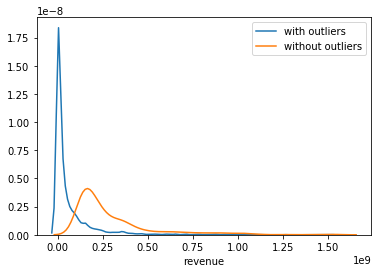

p-value:1.729161891552643e-74
-------------------------
keyword_cnt


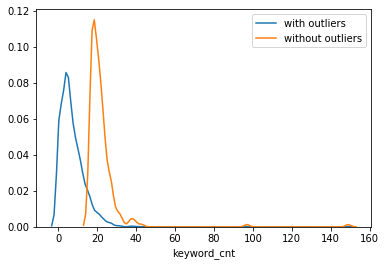

p-value:2.4411958975911024e-55
-------------------------
sw_collection


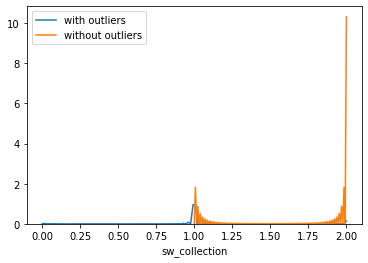

p-value:2.5400324174729947e-58
-------------------------
producers_cnt


C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


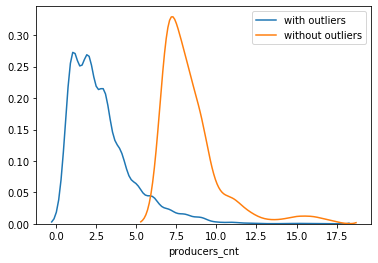

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


p-value:nan
-------------------------
countries_cnt


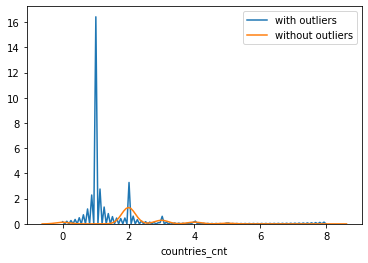

p-value:3.367763331147422e-104
-------------------------
keywords_cnt


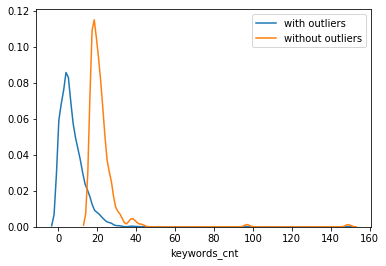

p-value:2.4411958975911024e-55
-------------------------
actor0_movies_cnt


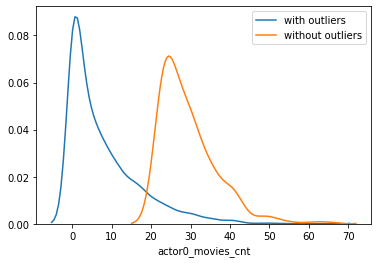

p-value:8.176850187328914e-150
-------------------------
actor0_movies_5y_cnt


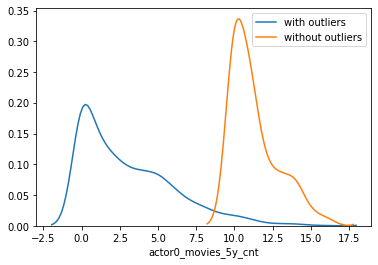

p-value:4.520217304337331e-115
-------------------------
actor1_movies_cnt


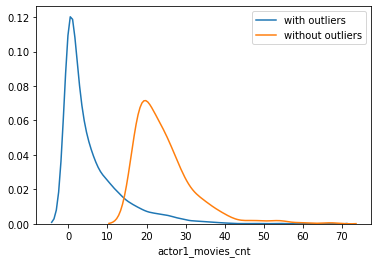

p-value:6.153407976849862e-130
-------------------------
actor1_movies_5y_cnt


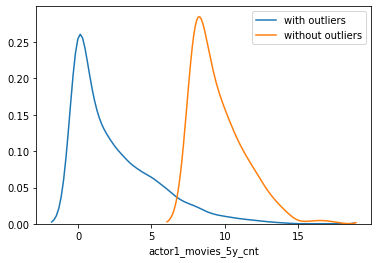

p-value:7.313571394036031e-143
-------------------------
actor2_movies_cnt


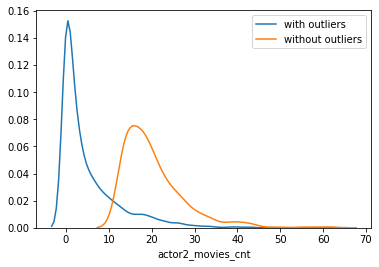

p-value:1.2662524869411065e-152
-------------------------
actor2_movies_5y_cnt


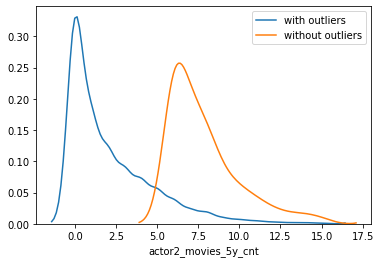

p-value:1.0217705938315166e-171
-------------------------
actor0_prev_revenue


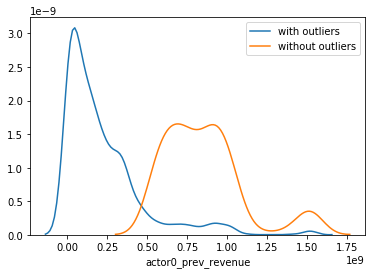

p-value:nan
-------------------------
actor1_prev_revenue


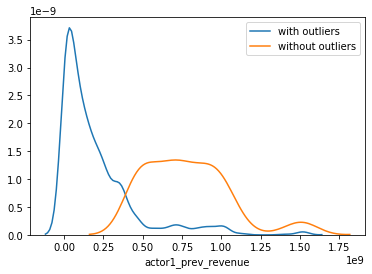

p-value:nan
-------------------------
actor2_prev_revenue


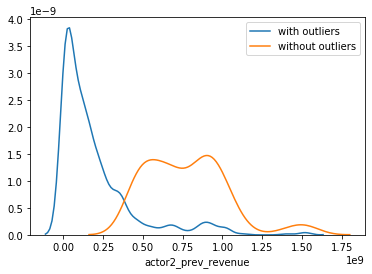

p-value:nan
-------------------------
director_movies_cnt


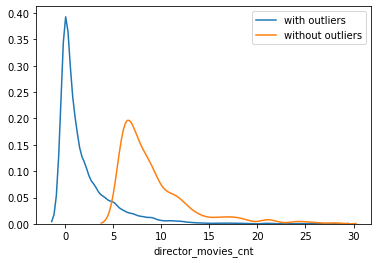

p-value:1.4134057531696487e-99
-------------------------
director_movies_5y_cnt


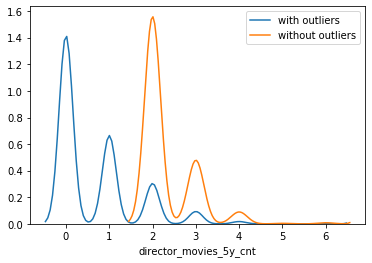

p-value:7.122735291809422e-281
-------------------------
depart_Art


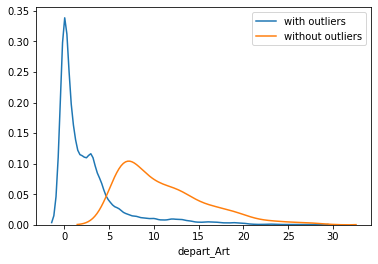

p-value:nan
-------------------------
depart_Camera


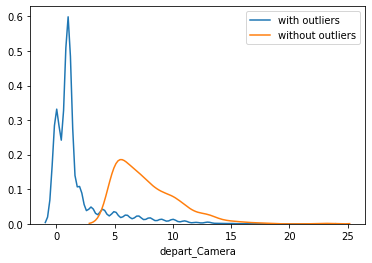

p-value:nan
-------------------------
depart_Crew


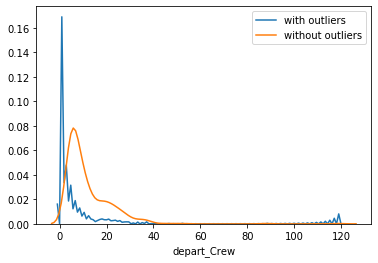

p-value:nan
-------------------------
depart_Custom_Mkup


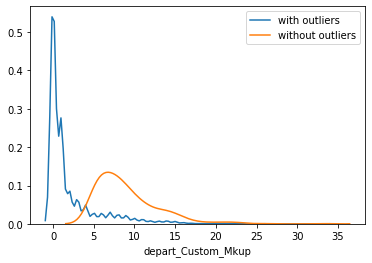

p-value:nan
-------------------------
depart_Directing


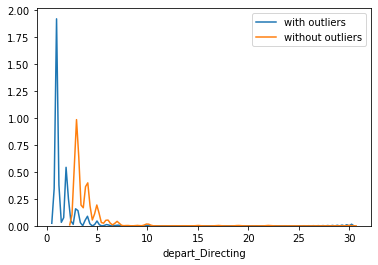

p-value:nan
-------------------------
depart_Editing


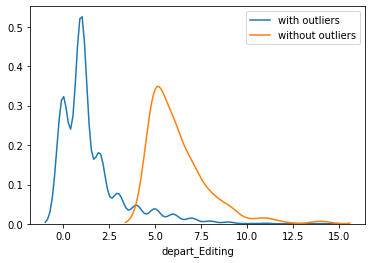

p-value:nan
-------------------------
depart_Lighting


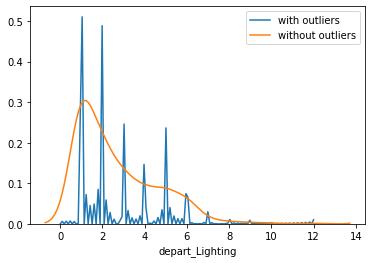

p-value:nan
-------------------------
depart_Production


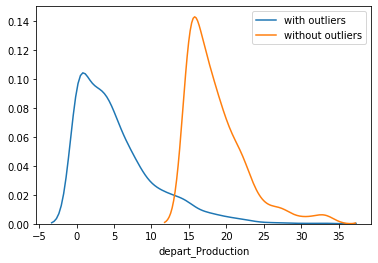

p-value:nan
-------------------------
depart_Sound


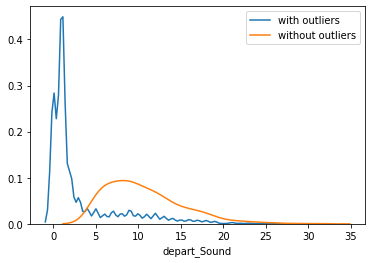

p-value:nan
-------------------------
depart_Visual_Effects


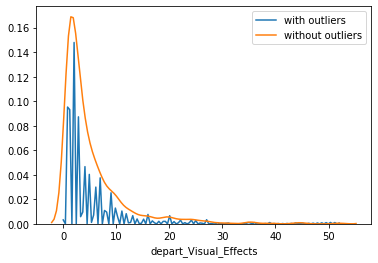

p-value:nan
-------------------------
depart_Writing


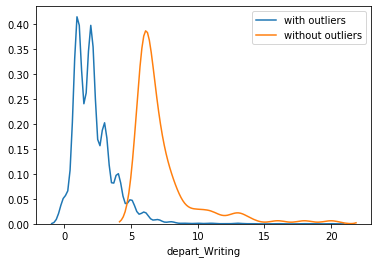

p-value:nan
-------------------------
depart_Art_female


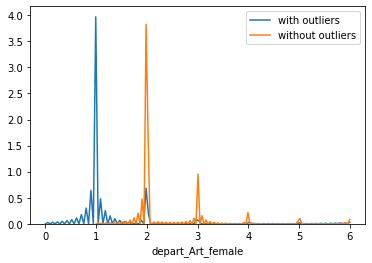

p-value:nan
-------------------------
depart_Camera_female


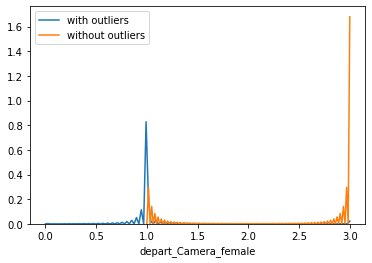

p-value:nan
-------------------------
depart_Crew_female


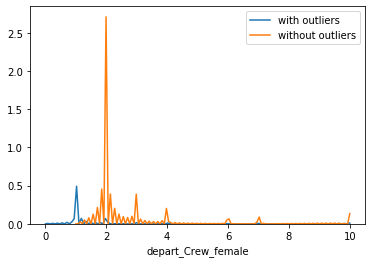

p-value:nan
-------------------------
depart_Custom_Mkup_female


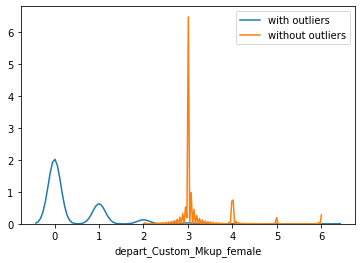

p-value:nan
-------------------------
depart_Directing_female


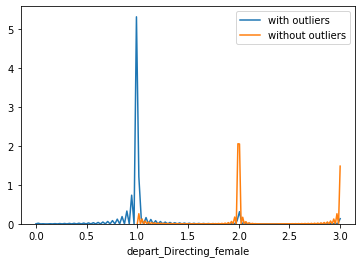

p-value:nan
-------------------------
depart_Editing_female


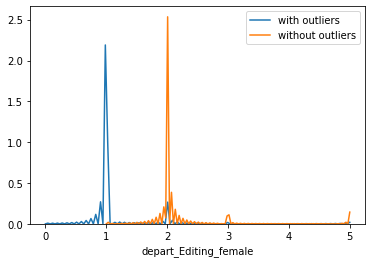

p-value:nan
-------------------------
depart_Lighting_female


C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


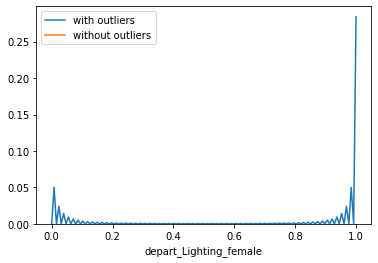

p-value:nan
-------------------------
depart_Production_female


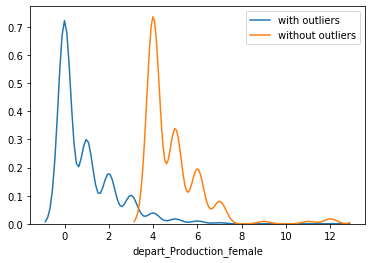

p-value:nan
-------------------------
depart_Sound_female


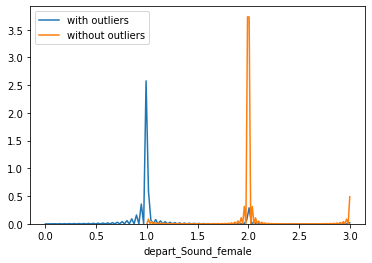

p-value:nan
-------------------------
depart_Visual_Effects_female


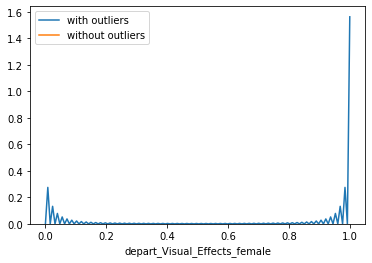

p-value:nan
-------------------------
depart_Writing_female


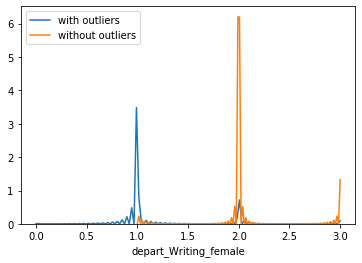

p-value:nan
-------------------------


In [20]:
#for 'cols_with_outliers', we check the significance of the difference in distributions between with and without outliers.
#only columns with significant diffenerce will ber included in the list 'ttest_signi'.
P_VALUE = 0.045 #threshold for t-test
ttest_signi = []
for column in cols_with_outliers:
    col_data = movies_f[column]
    col_data_no_outliers = movies_f[is_outlier(col_data)][column]
    print (f'{column}')
    sns.distplot(col_data, hist=False, kde_kws = {'label':'with outliers'})
    sns.distplot(col_data_no_outliers, hist=False, kde_kws = {'label':'without outliers'})
    plt.show()
    t, p = ttest_ind(col_data, col_data_no_outliers, equal_var=False)
    print (f'p-value:{p}\n-------------------------')
    if p < P_VALUE:
        ttest_signi.append(column)

### :המשתנים בהם ההתפלגות שונה עבור עם נתוני קיצון ובלי

In [21]:
ttest_signi

['budget',
 'popularity',
 'revenue',
 'keyword_cnt',
 'sw_collection',
 'countries_cnt',
 'keywords_cnt',
 'actor0_movies_cnt',
 'actor0_movies_5y_cnt',
 'actor1_movies_cnt',
 'actor1_movies_5y_cnt',
 'actor2_movies_cnt',
 'actor2_movies_5y_cnt',
 'director_movies_cnt',
 'director_movies_5y_cnt']

### 2

In [22]:
movies_f[is_outlier(movies_f[column])]

movie_id      budget  popularity runtime_cat     revenue sw_lang_en  \
1          2.0  40000000.0    8.248895      Medium  95149435.0          1   
21        22.0   4000000.0    7.992290      Medium  36690067.0          1   
33        34.0         0.0    8.254856       Large      7171.0          1   
44        45.0  15000000.0    5.615303       Short  47175038.0          1   
55        56.0         0.0    9.122718      Medium  36448200.0          1   
...        ...         ...         ...         ...         ...        ...   
2947    2955.0  60000000.0   10.411608      Medium  13395939.0          1   
2961    2969.0  25000000.0    6.514132      Medium   2405420.0          1   
2972    2980.0  35000000.0    6.629999      Medium  77477008.0          1   
2983    2991.0         0.0    1.560980       Short   7240837.0          1   
2984    2992.0  13000000.0    4.794088      Medium  91038276.0          1   

     sw_web_presence sw_has_poster sw_tagline  keyword_cnt release_year  \
1                  0             1          1          4.0       2004.0   
21                 0             1          1          9.0       1982.0   
33                 0             1          1          4.0       2014.0   
44                 1             1          1          6.0       2005.0   
55                 0             1          1          7.0       1993.0   
...              ...           ...        ...          ...          ...   
2947               0             1          1          6.0       2004.0   
2961               1             1          1          4.0       2005.0   
2972               1             1          1         10.0       2010.0   
2983               0             1          1          6.0       1997.0   
2984               0             1          1          3.0       2001.0   

     release_month high_release_month release_day  seasonality  sw_collection  \
1              8.0                  1         6.0  -33273015.0            0.0   
21             8.0                  1        13.0  -33273015.0            0.0   
33            10.0                  1         2.0  -28659422.0            0.0   
44             2.0                  0         4.0  -15309317.0            0.0   
55             7.0                  0         2.0   40981593.0            0.0   
...            ...                ...         ...          ...            ...   
2947          10.0                  1        22.0  -28659422.0            0.0   
2961          10.0                  1        22.0  -28659422.0            0.0   
2972           4.0                  0        23.0  -28405871.0            0.0   
2983           3.0                  0        28.0   -7149862.0            0.0   
2984           1.0                  0        12.0  -50746591.0            1.0   

      producers_cnt  countries_cnt lang_US lang_FR lang_RU lang_ES lang_JA  \
1               1.0            1.0       1       0       0       0       0   
21              2.0            1.0       1       0       0       0       0   
33              3.0            5.0       1       1       0       0       1   
44              3.0            1.0       1       0       0       0       0   
55              1.0            1.0       1       0       0       0       0   
...             ...            ...     ...     ...     ...     ...     ...   
2947            2.0            2.0       1       0       0       0       0   
2961            1.0            1.0       1       0       0       0       0   
2972            2.0            1.0       1       0       0       0       0   
2983            2.0            0.0       1       0       0       0       0   
2984            2.0            1.0       1       0       0       0       0   

      keywords_cnt  actor0_movies_cnt  actor0_movies_5y_cnt  \
1              4.0                3.0                   3.0   
21             9.0                0.0                   0.0   
33             4.0                0.0                   0.0   
44             6.0

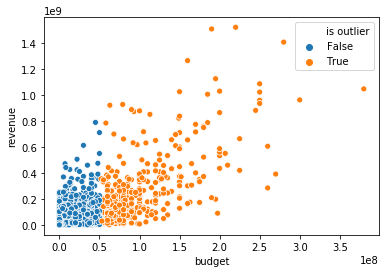

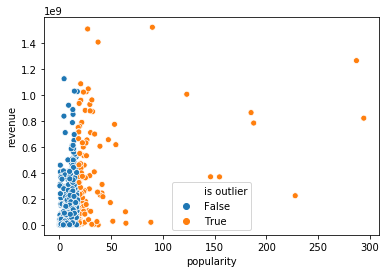

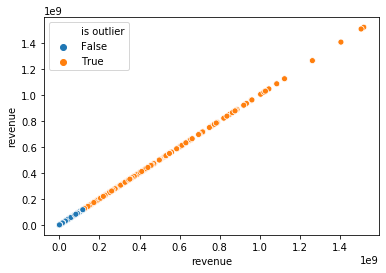

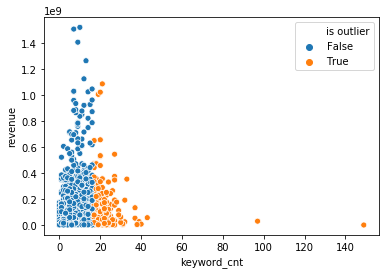

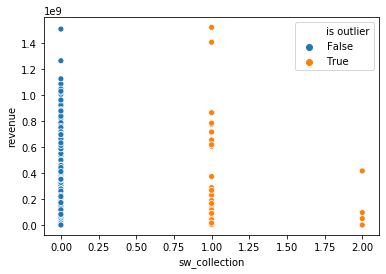

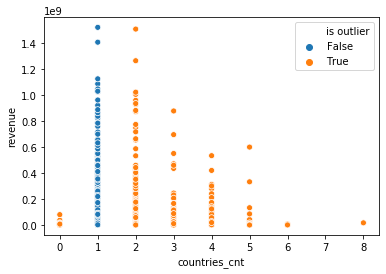

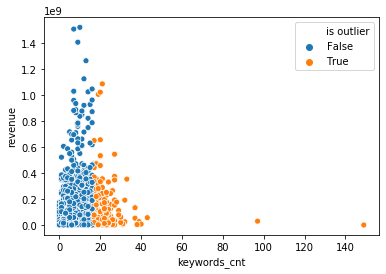

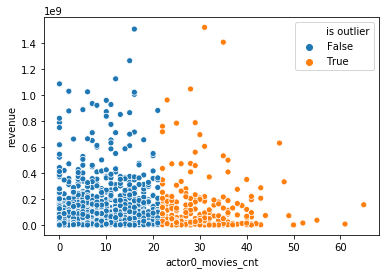

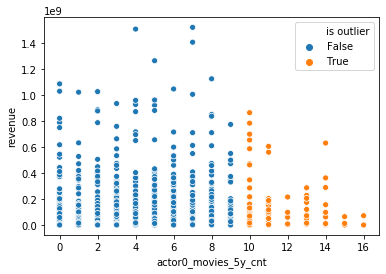

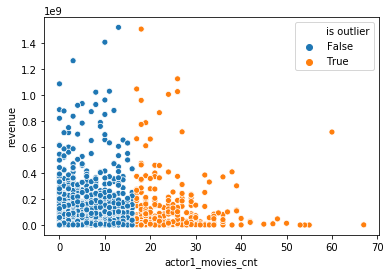

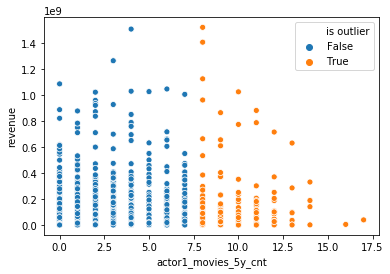

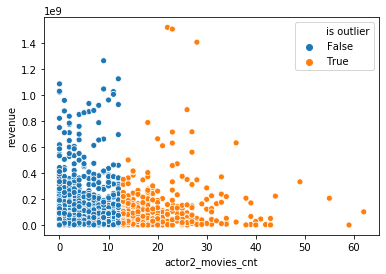

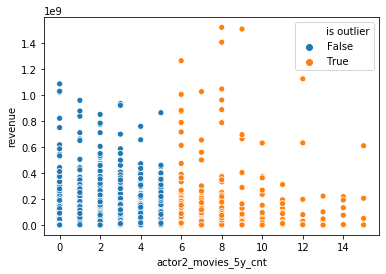

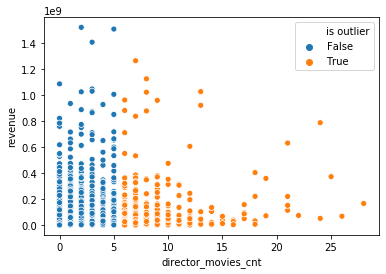

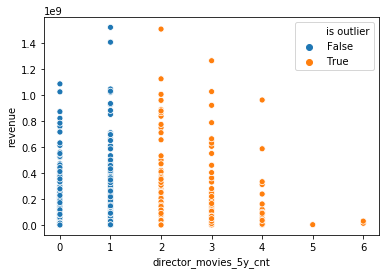

In [23]:
for column in ttest_signi:
    df_col = pd.DataFrame()
    df_col[column] =movies_f[column]
    df_col['revenue'] =movies_f['revenue']
    df_col['is outlier'] =is_outlier(movies_f[column])
    
    sns.scatterplot(x=column, y='revenue', hue='is outlier', data=df_col)
    plt.show()

### : המשתנה שיש בו שוני נראה לעין בהתפלגות משתנה המטרה עבור נתוני הקיצון מול נתונים ללא נתוני קיצון, הוא

budget

### 3

נבדוק האם נתוני הקיצון מתפלגים בצורה שונה במשתנה התקציב

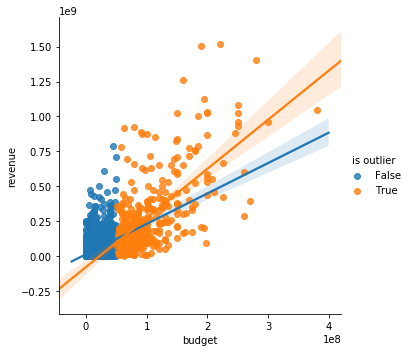

In [24]:
df_col = pd.DataFrame()
df_col['budget'] =movies_f['budget']
df_col['revenue'] =movies_f['revenue']
df_col['is outlier'] =is_outlier(movies_f['budget'])

sns.lmplot(x='budget', y='revenue', hue='is outlier', data=df_col)
plt.show()

### NAניתן לראות שנתוני הקיצון לא משנים את התוצאות ולכן נוכל להחליף אותם ב

In [25]:
#Create a copy of movies_f because we are changing it now.
movies_clean = movies_f.copy()
#Replace outliers with NA
for column in cols_with_outliers:
    col_data = movies_clean[column]
    movies_clean.loc[is_outlier(col_data)==False,column]=np.nan

## 3.2

### 1

movie_id
depart_Writing_female


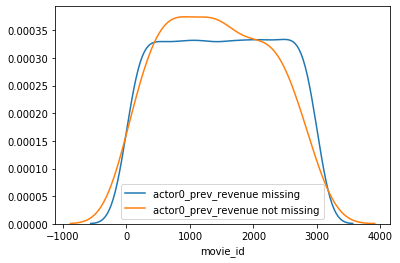

budget
depart_Writing_female


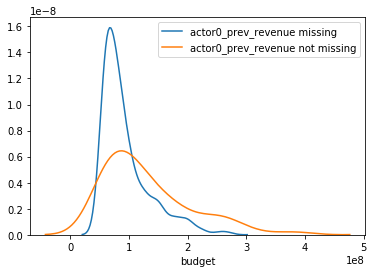

popularity
depart_Writing_female


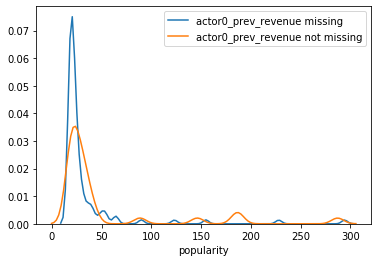

revenue
depart_Writing_female


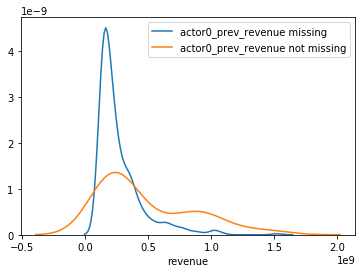

keyword_cnt
depart_Writing_female


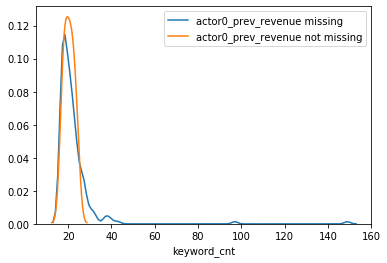

seasonality
depart_Writing_female


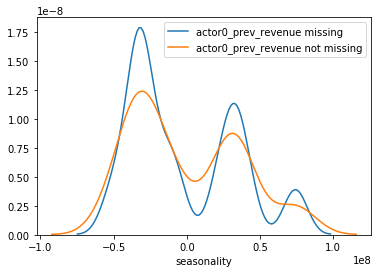

sw_collection
depart_Writing_female


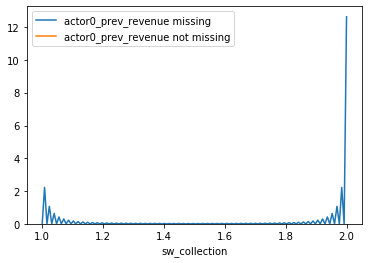

producers_cnt
depart_Writing_female


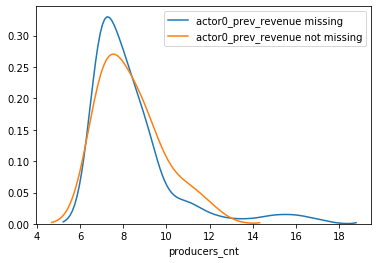

countries_cnt
depart_Writing_female


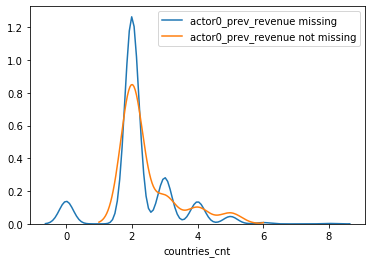

keywords_cnt
depart_Writing_female


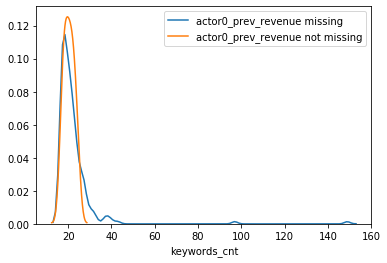

actor0_movies_cnt
depart_Writing_female


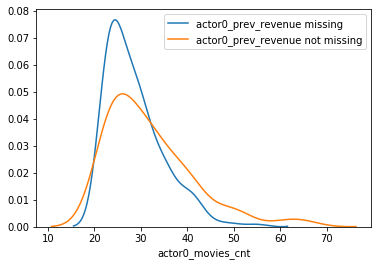

actor0_movies_5y_cnt
depart_Writing_female


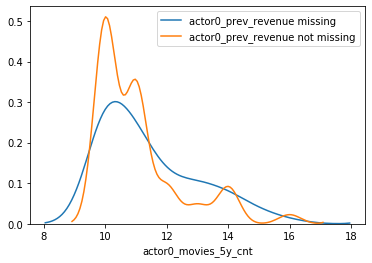

actor1_movies_cnt
depart_Writing_female


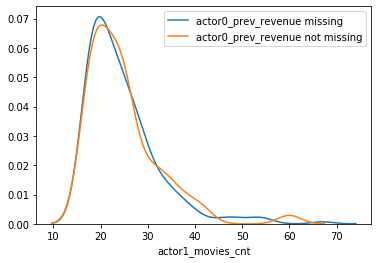

actor1_movies_5y_cnt
depart_Writing_female


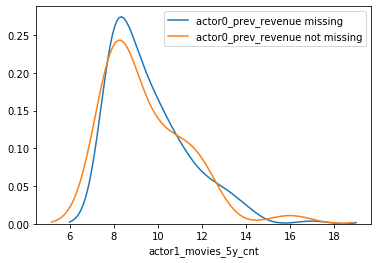

actor2_movies_cnt
depart_Writing_female


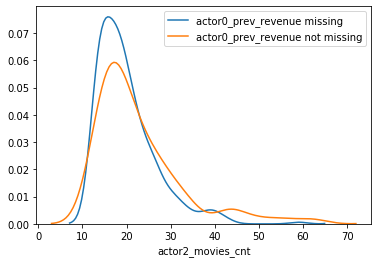

actor2_movies_5y_cnt
depart_Writing_female


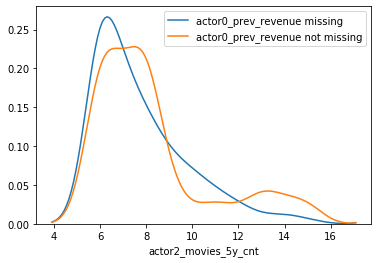

actor1_prev_revenue
depart_Writing_female


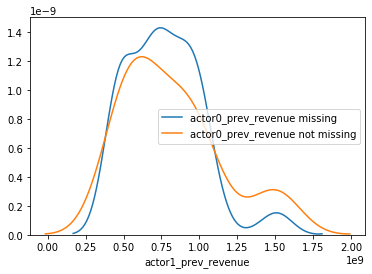

actor2_prev_revenue
depart_Writing_female


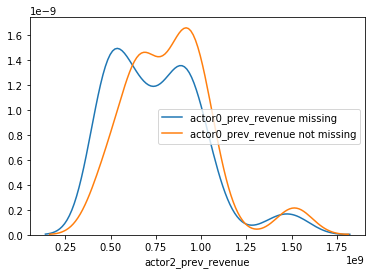

director_movies_cnt
depart_Writing_female


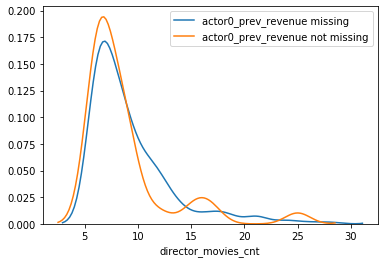

director_movies_5y_cnt
depart_Writing_female


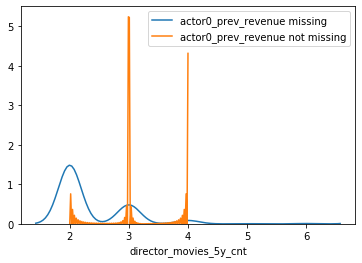

depart_Art
depart_Writing_female


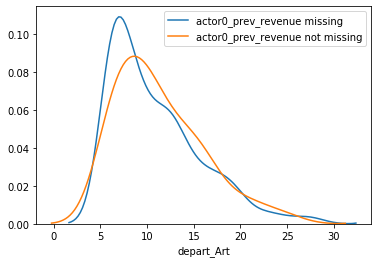

depart_Camera
depart_Writing_female


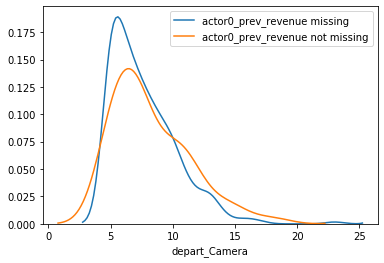

depart_Crew
depart_Writing_female


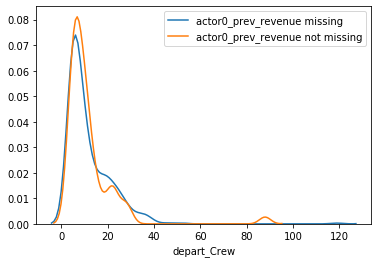

depart_Custom_Mkup
depart_Writing_female


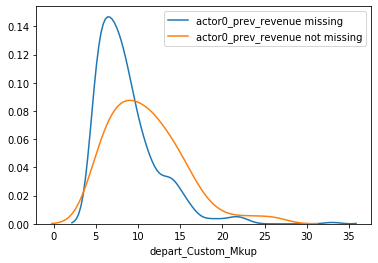

depart_Directing
depart_Writing_female


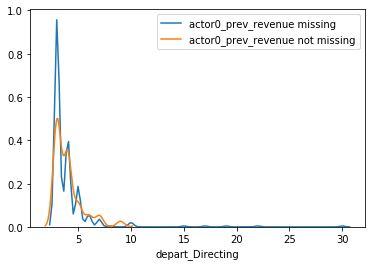

depart_Editing
depart_Writing_female


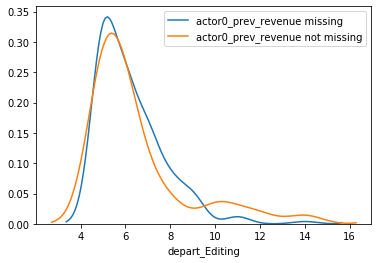

depart_Lighting
depart_Writing_female


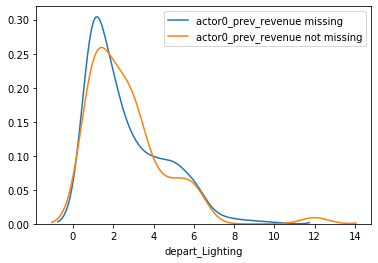

depart_Production
depart_Writing_female


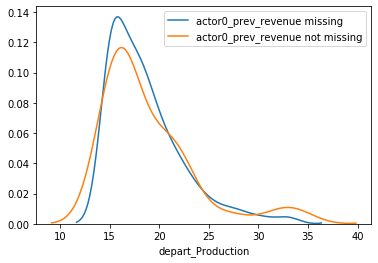

depart_Sound
depart_Writing_female


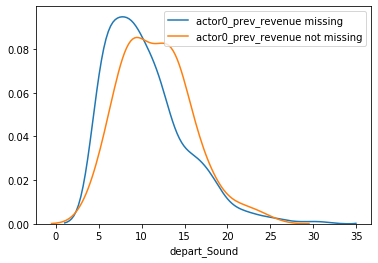

depart_Visual_Effects
depart_Writing_female


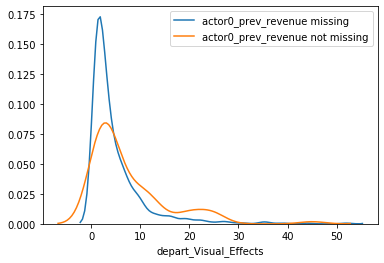

depart_Writing
depart_Writing_female


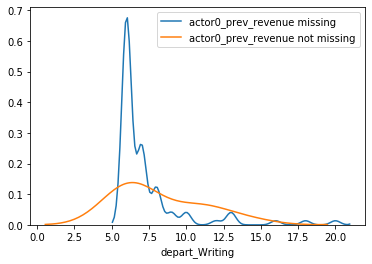

depart_Art_female
depart_Writing_female


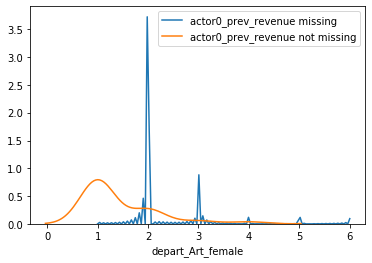

depart_Camera_female
depart_Writing_female


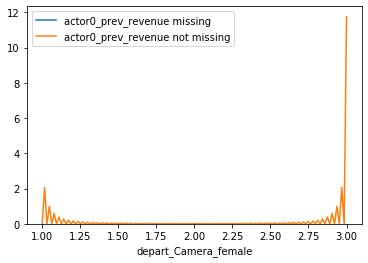

depart_Crew_female
depart_Writing_female


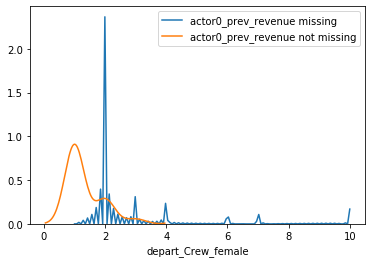

depart_Custom_Mkup_female
depart_Writing_female


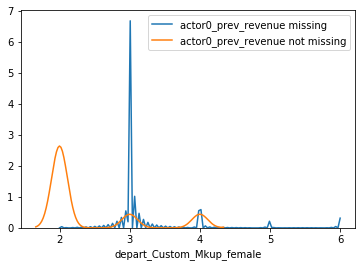

depart_Directing_female
depart_Writing_female


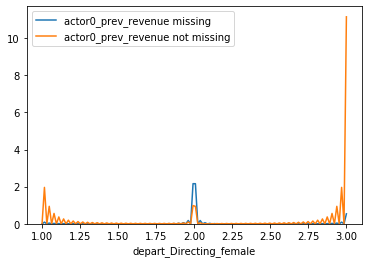

depart_Editing_female
depart_Writing_female


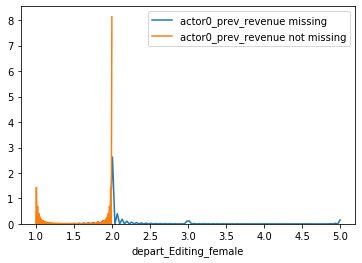

depart_Lighting_female
depart_Writing_female


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


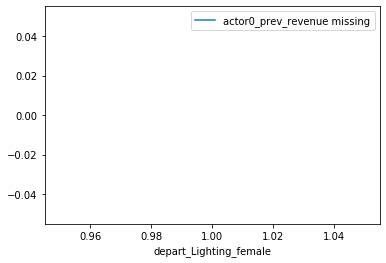

depart_Production_female
depart_Writing_female


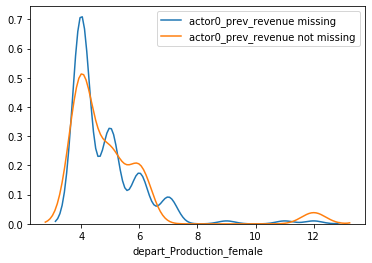

depart_Sound_female
depart_Writing_female


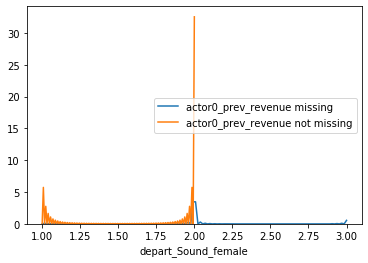

depart_Visual_Effects_female
depart_Writing_female


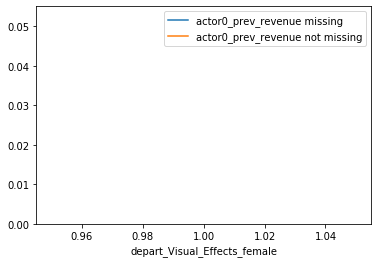

depart_Writing_female
depart_Writing_female


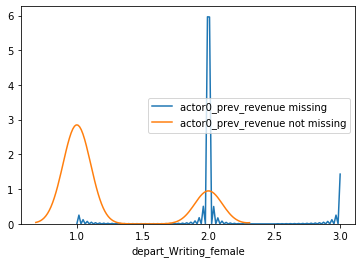

movie_id
depart_Writing_female


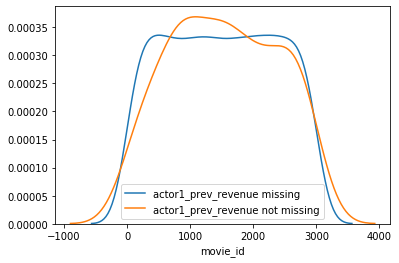

budget
depart_Writing_female


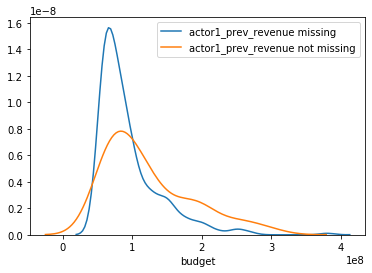

popularity
depart_Writing_female


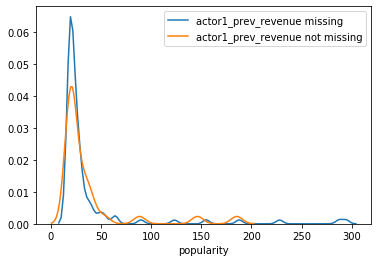

revenue
depart_Writing_female


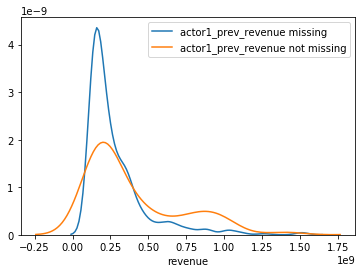

keyword_cnt
depart_Writing_female


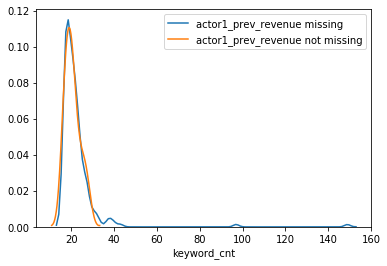

seasonality
depart_Writing_female


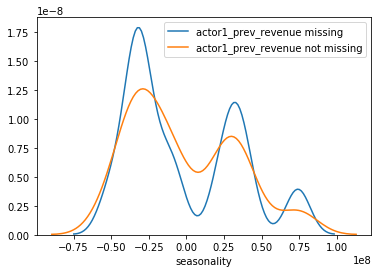

sw_collection
depart_Writing_female


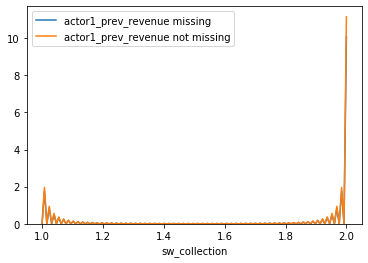

producers_cnt
depart_Writing_female


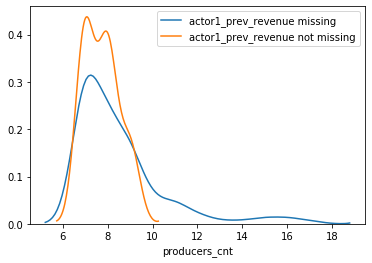

countries_cnt
depart_Writing_female


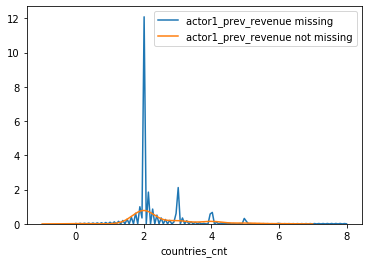

keywords_cnt
depart_Writing_female


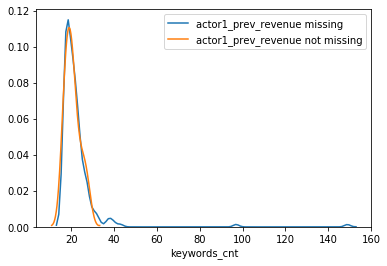

actor0_movies_cnt
depart_Writing_female


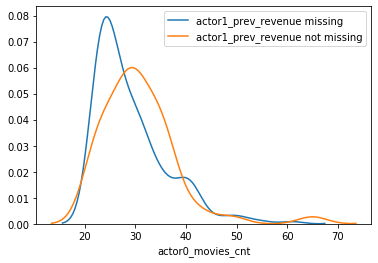

actor0_movies_5y_cnt
depart_Writing_female


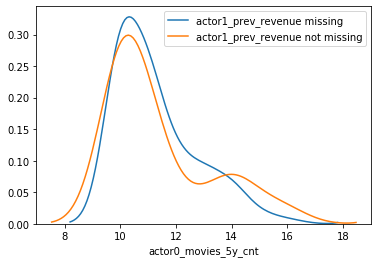

actor1_movies_cnt
depart_Writing_female


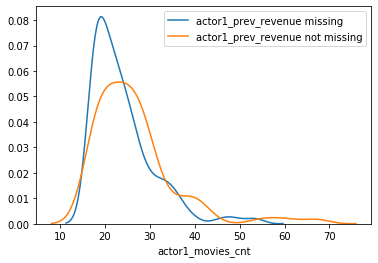

actor1_movies_5y_cnt
depart_Writing_female


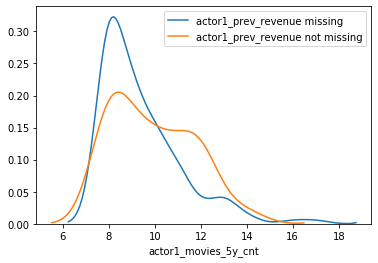

actor2_movies_cnt
depart_Writing_female


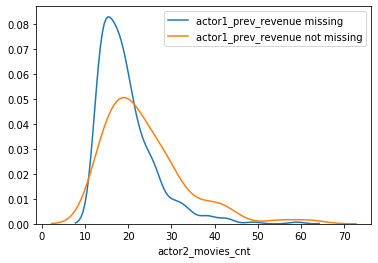

actor2_movies_5y_cnt
depart_Writing_female


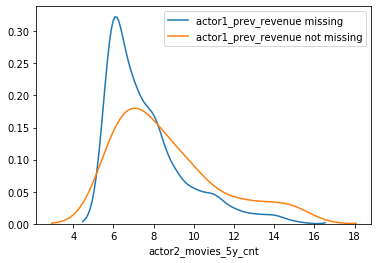

actor0_prev_revenue
depart_Writing_female


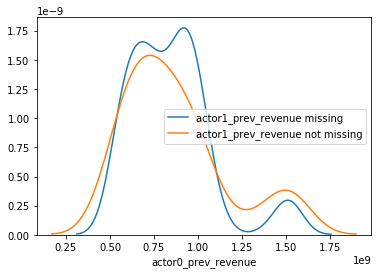

actor2_prev_revenue
depart_Writing_female


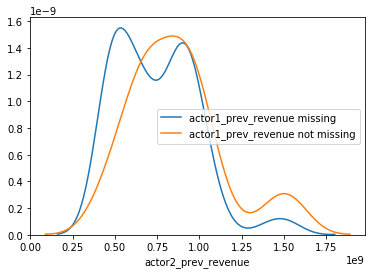

director_movies_cnt
depart_Writing_female


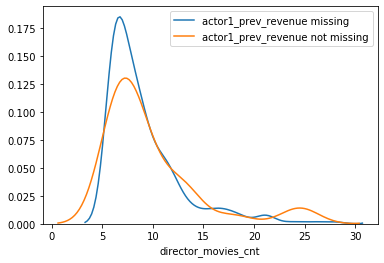

director_movies_5y_cnt
depart_Writing_female


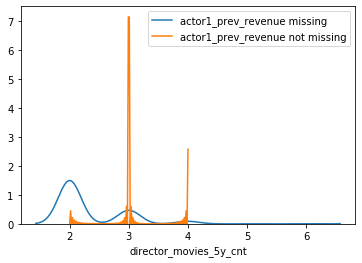

depart_Art
depart_Writing_female


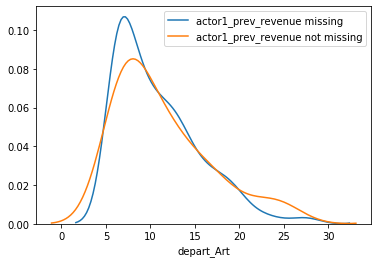

depart_Camera
depart_Writing_female


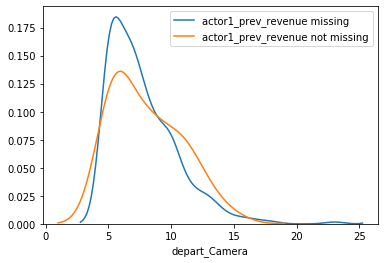

depart_Crew
depart_Writing_female


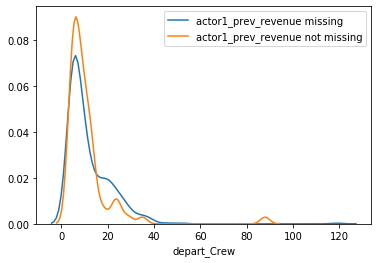

depart_Custom_Mkup
depart_Writing_female


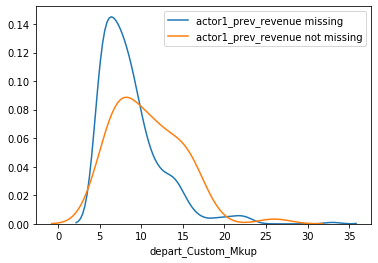

depart_Directing
depart_Writing_female


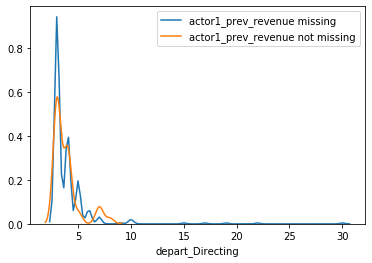

depart_Editing
depart_Writing_female


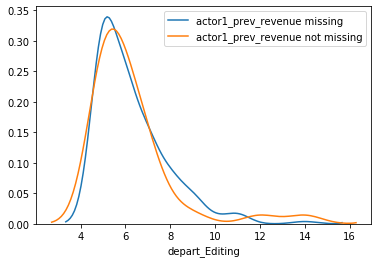

depart_Lighting
depart_Writing_female


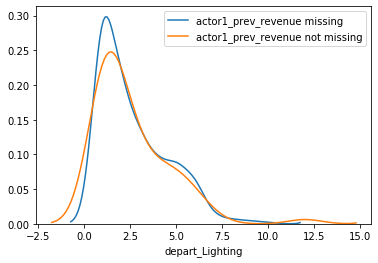

depart_Production
depart_Writing_female


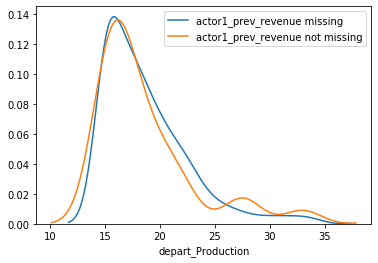

depart_Sound
depart_Writing_female


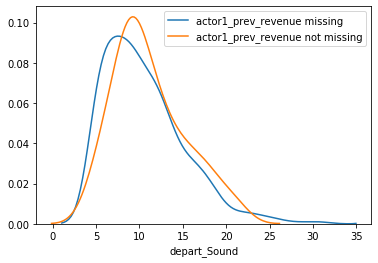

depart_Visual_Effects
depart_Writing_female


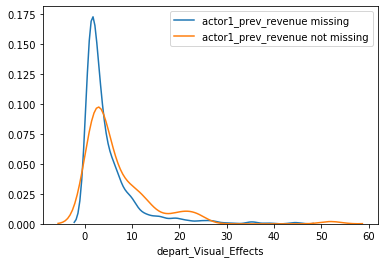

depart_Writing
depart_Writing_female


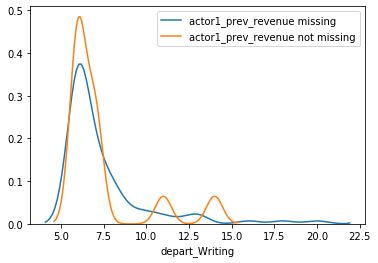

depart_Art_female
depart_Writing_female


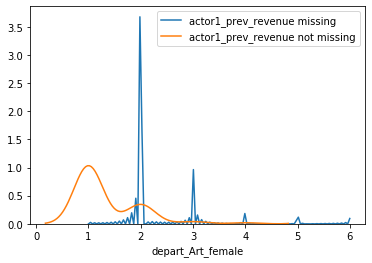

depart_Camera_female
depart_Writing_female


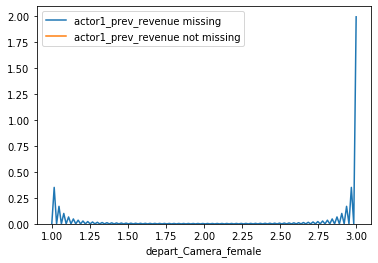

depart_Crew_female
depart_Writing_female


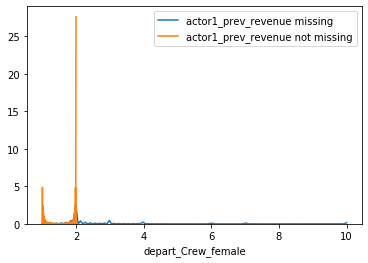

depart_Custom_Mkup_female
depart_Writing_female


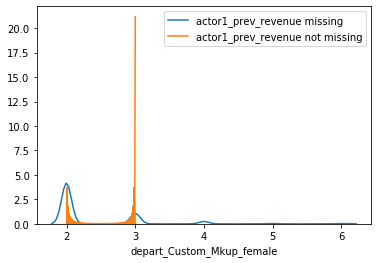

depart_Directing_female
depart_Writing_female


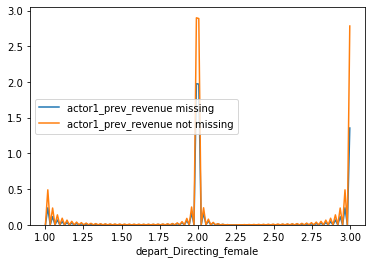

depart_Editing_female
depart_Writing_female


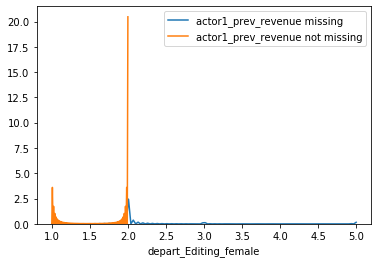

depart_Lighting_female
depart_Writing_female


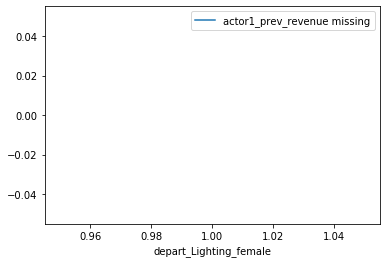

depart_Production_female
depart_Writing_female


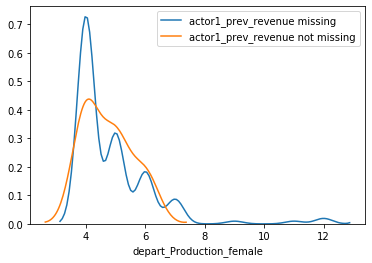

depart_Sound_female
depart_Writing_female


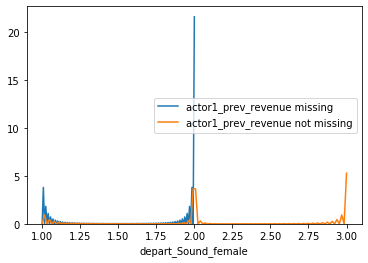

depart_Visual_Effects_female
depart_Writing_female


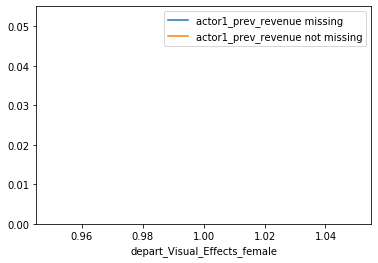

depart_Writing_female
depart_Writing_female


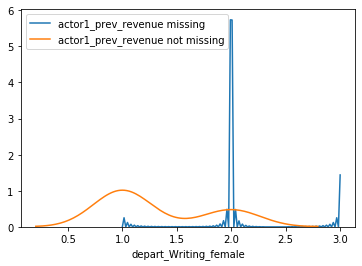

movie_id
depart_Writing_female


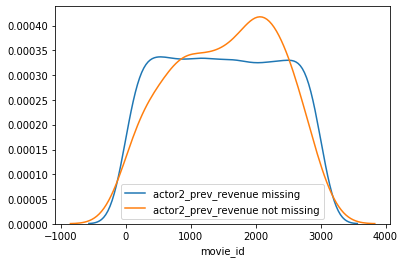

budget
depart_Writing_female


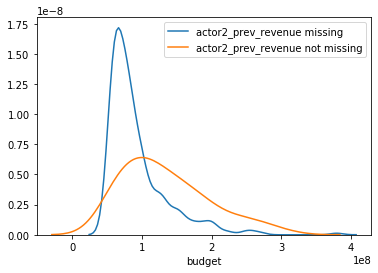

popularity
depart_Writing_female


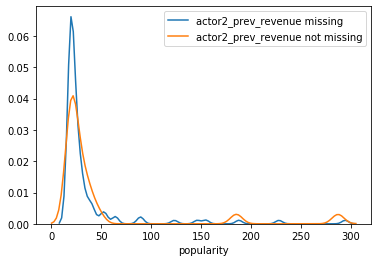

revenue
depart_Writing_female


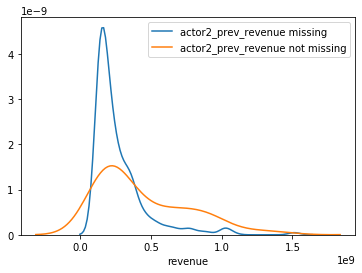

keyword_cnt
depart_Writing_female


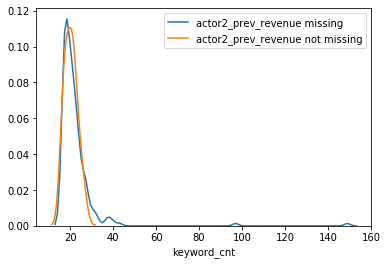

seasonality
depart_Writing_female


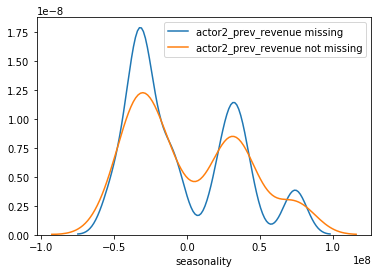

sw_collection
depart_Writing_female


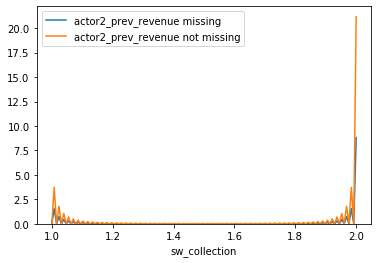

producers_cnt
depart_Writing_female


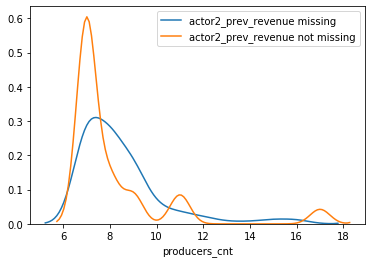

countries_cnt
depart_Writing_female


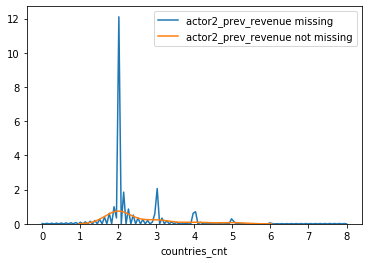

keywords_cnt
depart_Writing_female


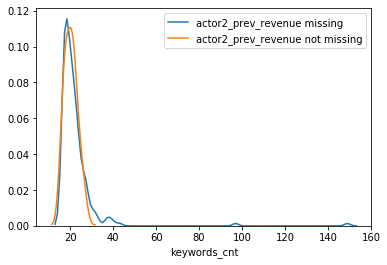

actor0_movies_cnt
depart_Writing_female


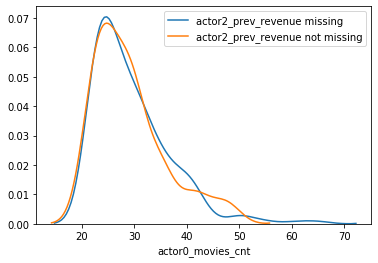

actor0_movies_5y_cnt
depart_Writing_female


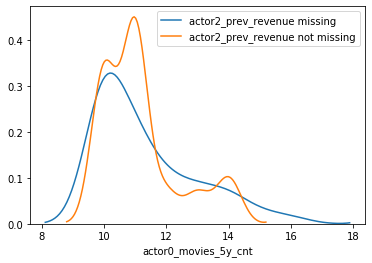

actor1_movies_cnt
depart_Writing_female


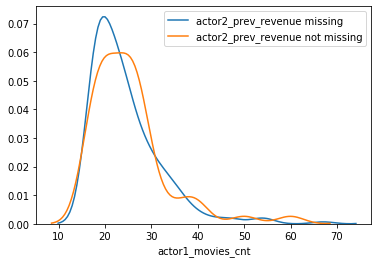

actor1_movies_5y_cnt
depart_Writing_female


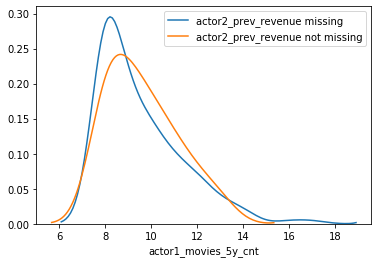

actor2_movies_cnt
depart_Writing_female


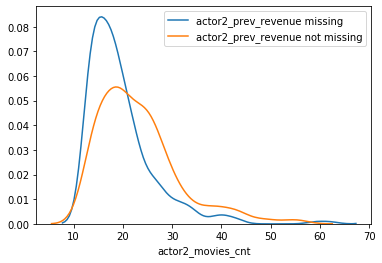

actor2_movies_5y_cnt
depart_Writing_female


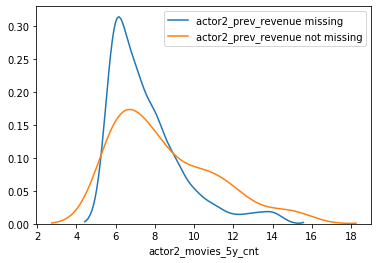

actor0_prev_revenue
depart_Writing_female


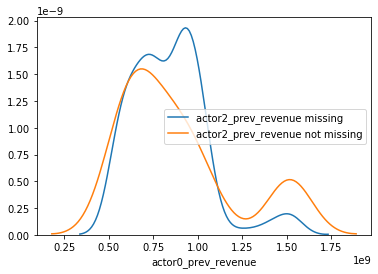

actor1_prev_revenue
depart_Writing_female


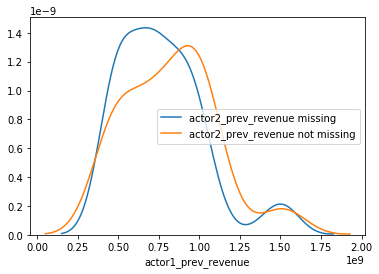

director_movies_cnt
depart_Writing_female


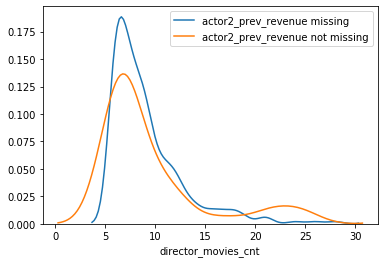

director_movies_5y_cnt
depart_Writing_female


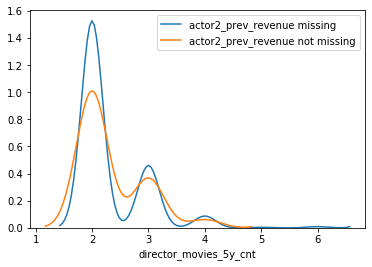

depart_Art
depart_Writing_female


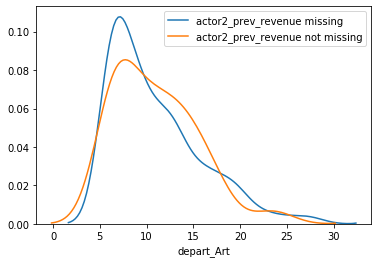

depart_Camera
depart_Writing_female


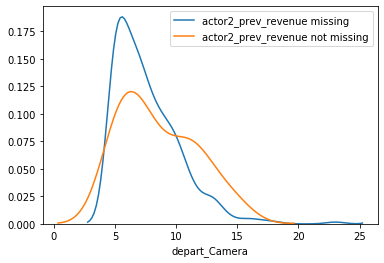

depart_Crew
depart_Writing_female


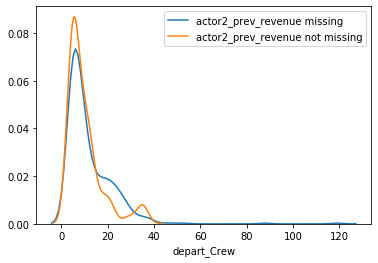

depart_Custom_Mkup
depart_Writing_female


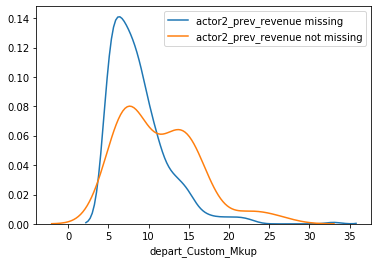

depart_Directing
depart_Writing_female


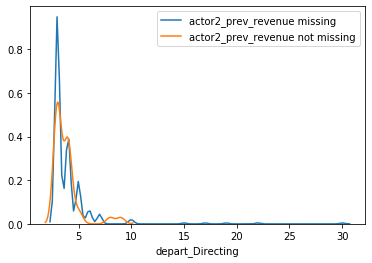

depart_Editing
depart_Writing_female


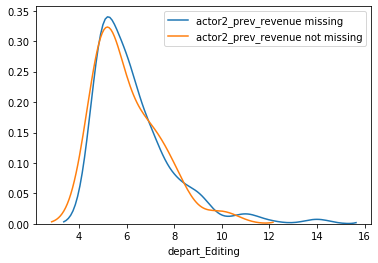

depart_Lighting
depart_Writing_female


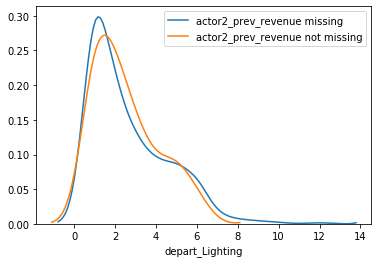

depart_Production
depart_Writing_female


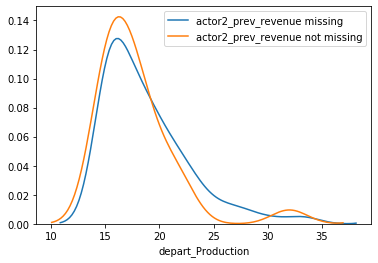

depart_Sound
depart_Writing_female


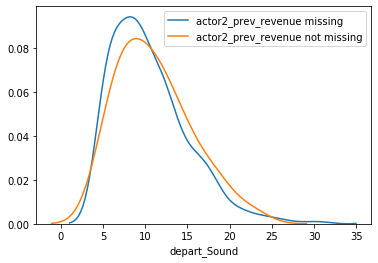

depart_Visual_Effects
depart_Writing_female


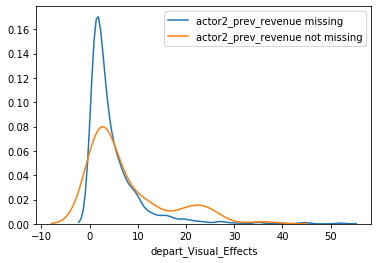

depart_Writing
depart_Writing_female


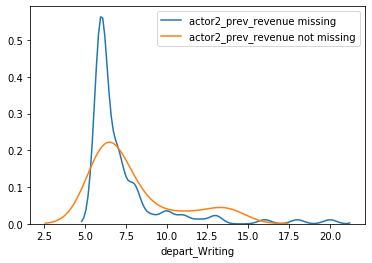

depart_Art_female
depart_Writing_female


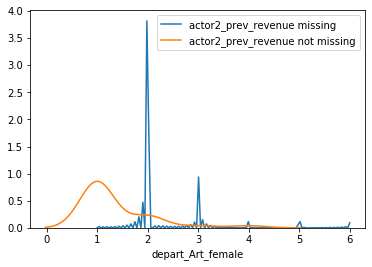

depart_Camera_female
depart_Writing_female


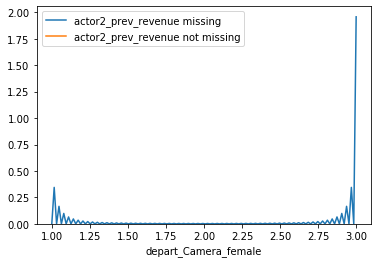

depart_Crew_female
depart_Writing_female


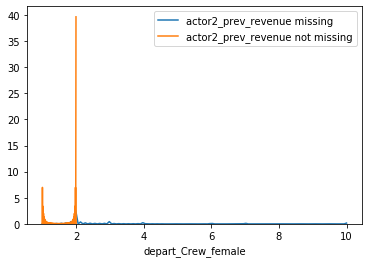

depart_Custom_Mkup_female
depart_Writing_female


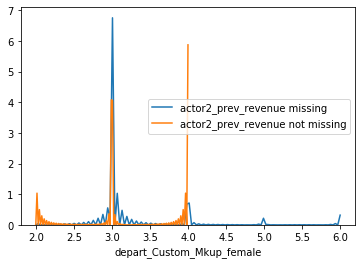

depart_Directing_female
depart_Writing_female


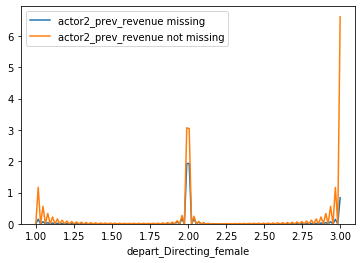

depart_Editing_female
depart_Writing_female


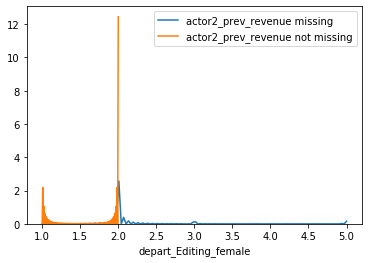

depart_Lighting_female
depart_Writing_female


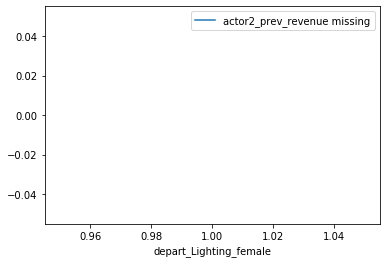

depart_Production_female
depart_Writing_female


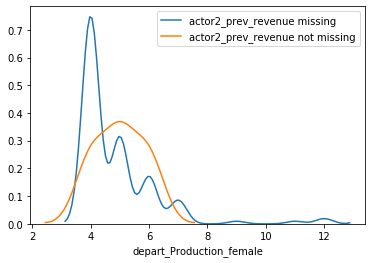

depart_Sound_female
depart_Writing_female


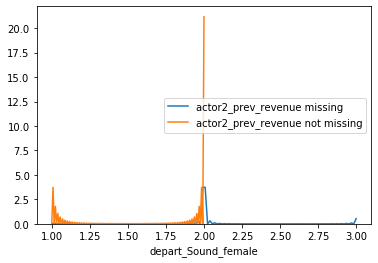

depart_Visual_Effects_female
depart_Writing_female


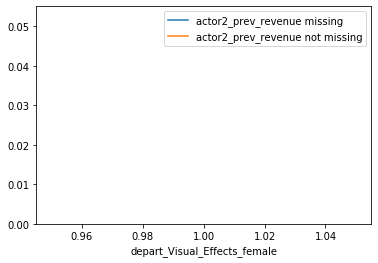

depart_Writing_female
depart_Writing_female


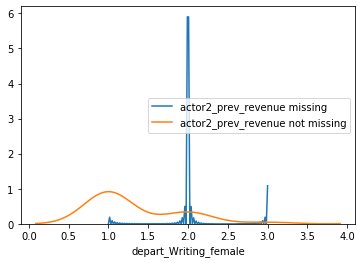

In [26]:
p_vals ={}
for i in high_miss_cols: #because of the amount of data, I run this only on the columns with high percent of missing- more than 5%.
    p_val_list=[]
    for j in numeric_cols:
        if j!=i:
            print (j)
            i_miss = movies_clean[j].dropna()[movies_clean[i].isna()]
            i_no_miss = movies_clean[j].dropna()[~movies_clean[i].isna()] # ~ is like NOT in SQL
            t, p = ttest_ind(i_miss, i_no_miss, equal_var=False)
            p_val_list.append(p)
            print (f'{column}')
            sns.distplot(i_miss, hist=False, kde_kws = {'label': f'{i} missing'})
            sns.distplot(i_no_miss, hist=False, kde_kws = {'label':f'{i} not missing'})
            plt.show()
    p_vals[i]=p_val_list

## 2

בטבלה למטה ניתן לראות עבור כל אחד מ3 המשתנים המכילים יותר מ5% חסרים, 
p-valueאת ה

.MNARכאשר הוא קטן מ0.05, ההבדל בין התפלגויות החסרים והלא חסרים הוא מובהק, כלומר מדובר ב

.MAR או MCARבשאר המקרים ככל הנראה מדובר ב

In [29]:
pd.DataFrame(p_vals)

actor0_prev_revenue  actor1_prev_revenue  actor2_prev_revenue
0              0.146033             0.497699             0.496264
1              0.000700             0.001156             0.000002
2              0.151720             0.965136             0.531861
3              0.000073             0.005763             0.000061
4              0.066162             0.234898             0.083379
5              0.443632             0.920016             0.149539
6              0.044637             0.933092             0.582785
7              0.849092             0.001264             0.551466
8              0.038259             0.013605             0.010349
9              0.066162             0.234898             0.083379
10             0.008525             0.162254             0.714552
11             0.187522             0.819889             0.579097
12             0.835560             0.029223             0.528759
13             0.677567             0.073289             0.787322
14             0.030604             0.000292             0.000121
15             0.186946             0.004486             0.001939
16             0.311975             0.567210             0.348653
17             0.065524             0.009351             0.214346
18             0.469053             0.470805             0.660968
19             0.141108             0.255407             0.895114
20             0.517176             0.430816             0.990946
21             0.189832             0.451359             0.079460
22             0.946465             0.560231             0.107199
23             0.000450             0.000691             0.000705
24             0.886092             0.507855             0.402374
25             0.505572             0.910720             0.327293
26             0.881600             0.840881             0.539921
27             0.753793             0.915277             0.239673
28             0.017728             0.216043             0.358014
29             0.006053             0.020891             0.006536
30             0.346539             0.853390             0.433271
31             0.162491             0.595532             0.460111
32             0.346594             0.321941             0.321854
33             0.752324             0.038026             0.181457
34             0.668090             0.011794             0.532991
35             0.114441             0.454740             0.085903
36             0.176682             0.958512             0.400857
37                  NaN                  NaN                  NaN
38             0.784500             0.507120             0.608476
39             0.526894             0.419845             0.867855
40                  NaN                  NaN                  NaN
41             0.525989             0.176893             0.176025

## 3

:ב3 המשתנים שבהם יש יותר מ5% חסרים, הכמויות של החסרים משמעותיות

actor0_prev_revenue: 31%

actor1_prev_r evenue: 38.5%

actor2_prev_revenue: 41.4%

.במקרים כאלו, נבדוק האם מדובר במשתנים בעלי קורלציה חזקה עם משתנה המטרה

.אם לא - ניתן למחוק את המשתנים

."אם כן - לא נרצה לוותר עליהם, נהפוך אותם למשתנים קטגוריאליים, כאשר נקבע מספר טווחים והטווח הנוסף יהיה "לא ידוע

random forestעבור שאר המשתנים בהם יש פחות מ5% חסרים, ניתן להשתמש ב 

In [ ]:
#For low percent of missing
from sklearn.ensemble import RandomForestRegressor
p_vals ={}
low_miss = [col for col in miss_cols if col not in high_miss_cols ]

for column_to_complete in low_miss: #because of the amount of data, I run this only on the columns with high percent of missing- more than 5%.

    test_set = movies_clean[movies_clean[column_to_complete].isna()]
    train_set =movies_clean[~movies_clean[column_to_complete].isna()] # ~ is like NOT in SQL
    rfModel = RandomForestRegressor()
    rfModel.fit(train_set.drop(column_to_complete), train_set[column_to_complete])
    column_missing_guess = rfModel.predict(X= test_set[column_to_complete])
    movies_clean[movies_clean[column_to_complete].isna()][column_to_complete]=column_missing_guess

In [47]:
#For high percent of missing
for column_to_complete in high_miss_cols: 
    num_of_categories = 5
    categories = [f'{100*quantile/bins}%' for quantile in range(1,num_of_categories+1)]
    bins =[np.quantile(movies_clean[column_to_complete].dropna(),quantile/bins) for quantile in range(0,num_of_categories+1)]
    movies_clean[f'{column_to_complete}_cat'] = pd.cut(movies_clean[column_to_complete], bins, labels=categories)
movies_clean.drop(high_miss_cols)